## Project #3: Multiple Regression

Lillian Jensen

Goal: Students will use R to apply data management and manipulation techniques to address when assumptions are not met for linear regression analyses. 

This data is taken from a nationwide data collection effort that collects information about hospital discharges in the United States. It can be used for many different purposes including studying costs, length of stay, insurance utilization, among others. Because of confidentiality issues, I cannot provide all of the variables, all of the records, or any identifying information. In fact, I cannot even tell you where I got the data. But I can use it for teaching purposes. That being said, this is one of the largest databases in the country that compiles this type of information. It is widely used in publishing and to make decisions about resource allocation, system improvement, and policy development. We are using it to practice linear regression using hospital charges ($$) as our dependent variable. A list of variables, descriptions, and codes is included on D2L (Linear Regression Codebook.doc). You will need this information while you are doing your analyses and especially while you are interpreting your results.

Instructions:

First, because this is only a subsample of data, you will need to weight the data. Use the following variables from the dataset: Dependent variable: HospCharges.  Independent variables: Age, Income_Zip, Insurance, Number_Diagnoses, Number_Procedures, Race, Sex, and Urban_Rural.  You will want to review the Codebook to learn more about these variables. 

---

In [78]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(rstatix))
suppressPackageStartupMessages(library(GGally))
suppressPackageStartupMessages(library(car))

In [125]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\HM 878 730 Clements Linear Regression Data.csv")

In [80]:
colnames(df)

[1] "HospCharges"       "Age"               "Income_Zip"       
 [4] "Insurance"         "Number_Diagnoses"  "Number_Procedures"
 [7] "Race"              "Sex"               "Urban_Rural"      
[10] "Weight"

---

## Describe how your regression meets or does not meet the assumptions of 1) no outliers in the dependent variable, 2) multicollinearity (for these purposes use a correlation coefficient of >0.500 to indicate multicollinearity even with acceptable VIF statistics), and 3) normality. 

---

**- No outliers in the dependent variable**

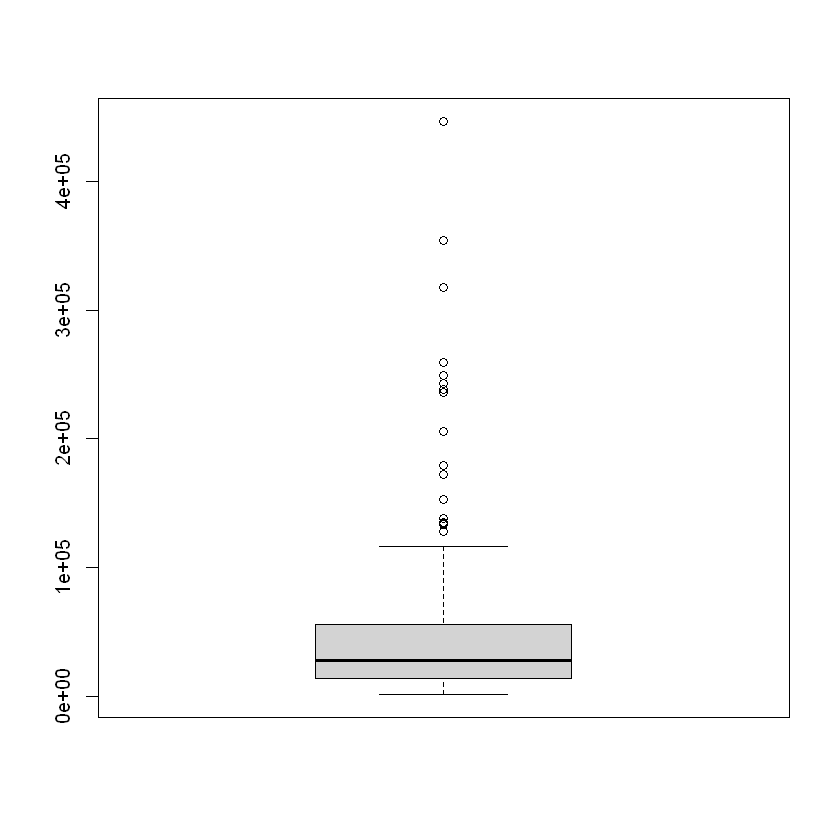

In [81]:
boxplot(df$HospCharges)

Noting numerous outliers in the dependent variable

In [82]:
summary(df$HospCharges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1514   13996   28267   48429   54737  446603 

In [83]:
upper.fence <- summary(df$HospCharges)[['3rd Qu.']] + 1.5*IQR(df$HospCharges)

In [84]:
lower.fence <- summary(df$HospCharges)[['1st Qu.']] - 1.5*IQR(df$HospCharges)

In [85]:
paste('IQR: ',IQR(df$HospCharges))
paste('Upper Fence: ',upper.fence)
paste('Lower Fence: ',lower.fence)

[1] "IQR:  40741.75"

[1] "Upper Fence:  115849.875"

[1] "Lower Fence:  -47117.125"

--

**-Normality**

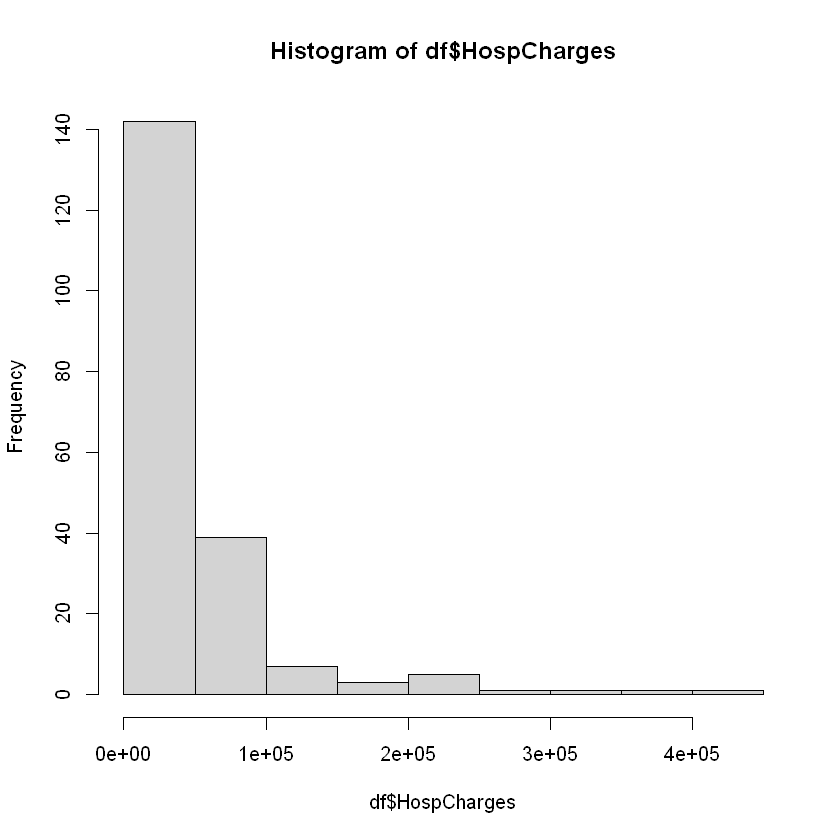

In [86]:
hist(df$HospCharges)

Noting the abnormal shape of the dependent variable distribution

--

**-Multicollinearity**

In [126]:
# Selecting a data subset with only ind. variables
ind <- df |> select(-c('HospCharges','Weight'))

In [127]:
cor_mat(ind, method='spearman')

,rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.0000,0.1200,-0.38000,0.5700,-0.190,-0.27000,-0.120,-0.0059
2,Income_Zip,0.1200,1.0000,0.10000,-0.0064,-0.036,-0.06100,0.062,-0.3400
3,Insurance,-0.3800,0.1000,1.00000,-0.4400,0.056,0.00045,0.039,-0.0056
4,Number_Diagnoses,0.5700,-0.0064,-0.44000,1.0000,0.023,-0.14000,-0.048,-0.0070
5,Number_Procedures,-0.1900,-0.0360,0.05600,0.0230,1.000,0.03200,0.055,-0.1400
6,Race,-0.2700,-0.0610,0.00045,-0.1400,0.032,1.00000,0.100,-0.1700
7,Sex,-0.1200,0.0620,0.03900,-0.0480,0.055,0.10000,1.000,-0.0320
8,Urban_Rural,-0.0059,-0.3400,-0.00560,-0.0070,-0.140,-0.17000,-0.032,1.0000


In [128]:
cor_get_pval(cor_mat(ind, method='spearman'))

rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.00e+00,9.01e-02,2.43e-08,6.01e-19,0.00676,0.000134,0.0952,9.34e-01
Income_Zip,9.01e-02,0.00e+00,1.54e-01,9.29e-01,0.61600,0.403000,0.3900,1.06e-06
Insurance,2.43e-08,1.54e-01,0.00e+00,1.12e-10,0.43400,0.995000,0.5880,9.38e-01
Number_Diagnoses,6.01e-19,9.29e-01,1.12e-10,0.00e+00,0.74400,0.045100,0.5030,9.21e-01
Number_Procedures,6.76e-03,6.16e-01,4.34e-01,7.44e-01,0.00000,0.655000,0.4420,5.54e-02
Race,1.34e-04,4.03e-01,9.95e-01,4.51e-02,0.65500,0.000000,0.1420,1.43e-02
Sex,9.52e-02,3.90e-01,5.88e-01,5.03e-01,0.44200,0.142000,0.0000,6.53e-01
Urban_Rural,9.34e-01,1.06e-06,9.38e-01,9.21e-01,0.05540,0.014300,0.6530,0.00e+00


Noting significant correlations between Age and Insurance, Age and Number_Diagnoses, Age and Number_Procedures, Age and Race, Age and Sex, Income_Zip  and Urban_Rural, Number_Diagnoses and Insurance, Number_Diagnoses and Race, and Race and Urban_Rural.

Of those with significant correlations, Age and Number_Diagnoses are the only ones with correlation factors >0.5. 

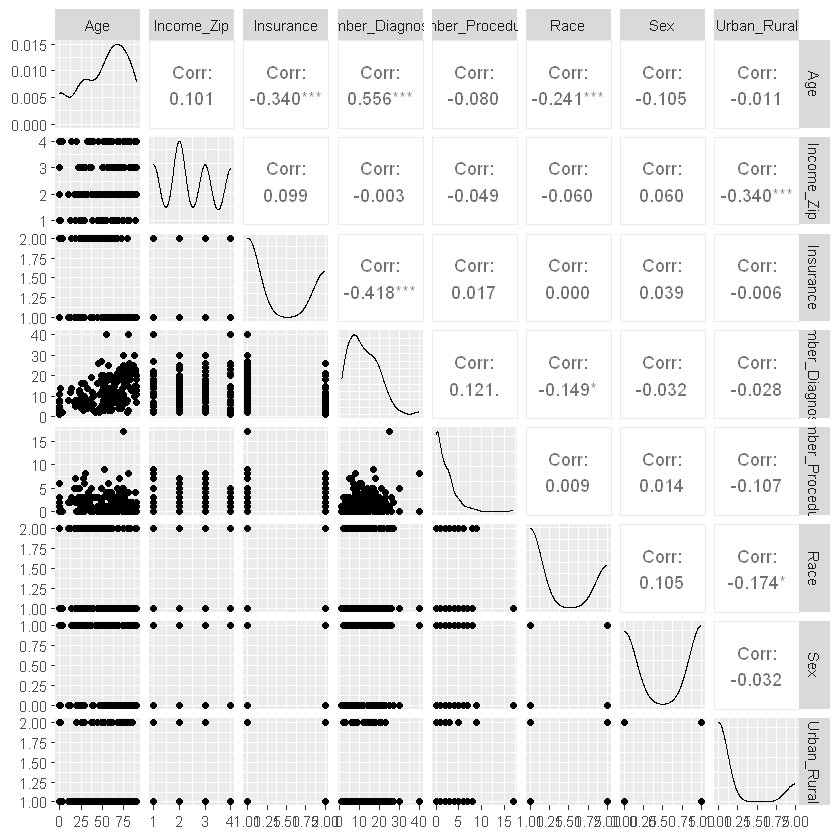

In [129]:
suppressWarnings(print(ggpairs(ind)))

^ Further evidence for multicollinearity among independent variables

---

## Run a regression analysis with HospCharges as the Dependent Variable. Use Age, Income_Zip, Insurance, Number_Diagnoses, Number_Procedures, Race, Sex, and Urban_Rural as the dependent variables. Interpret the output and different analyses that you saw in the demo videos. 

In [92]:
# First model, with no transformations and no dropped variables
mod1 <- lm(HospCharges ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df,weights = Weight)

In [93]:
summary(mod1)


Call:
lm(formula = HospCharges ~ Age + Income_Zip + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df, 
    weights = Weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-259000  -49927  -14824   30648  531823 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -8184.1    29038.2  -0.282    0.778    
Age                  134.7      169.1   0.797    0.427    
Income_Zip          1180.5     3635.5   0.325    0.746    
Insurance           3321.0     8352.3   0.398    0.691    
Number_Diagnoses    2715.4      627.1   4.330 2.45e-05 ***
Number_Procedures  13967.8     1935.5   7.217 1.37e-11 ***
Race                1342.9     7975.3   0.168    0.866    
Sex                -9759.9     7190.1  -1.357    0.176    
Urban_Rural       -10274.9    10316.7  -0.996    0.321    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 109900 on 183 degrees of freed

In [94]:
data.frame(vif(mod1))

,vif.mod1.
,<dbl>
Age,1.704414
Income_Zip,1.188162
Insurance,1.292406
Number_Diagnoses,1.681573
Number_Procedures,1.073313
Race,1.140655
Sex,1.024647
Urban_Rural,1.204302


Ind. variables with similar variance inflation factors may be somewhat colinear, especially when they are significantly correlated with one another.

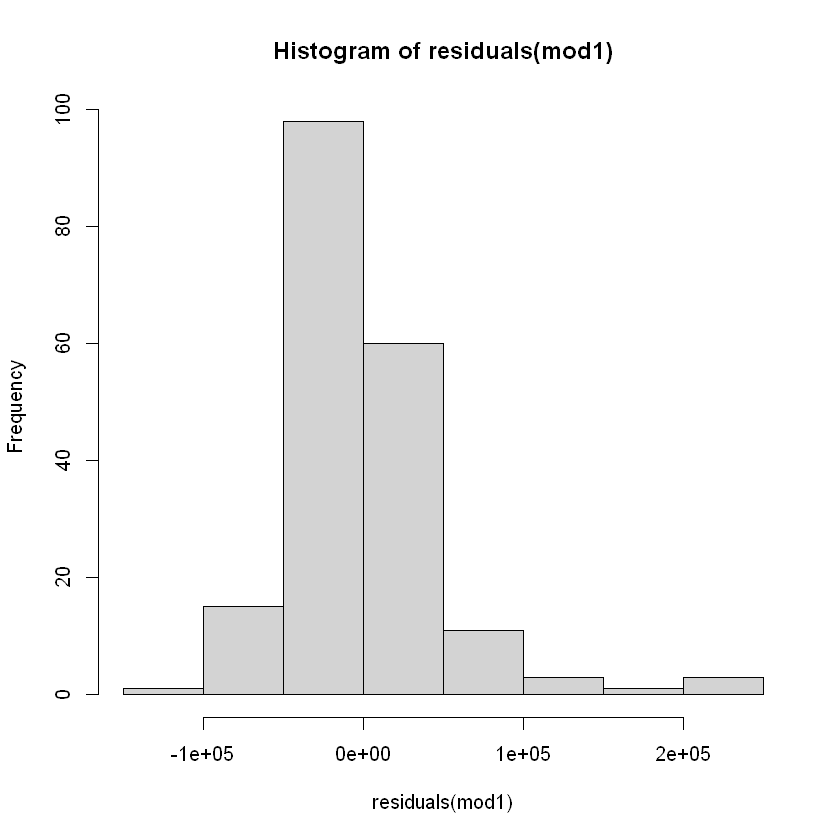

In [95]:
hist(residuals(mod1))

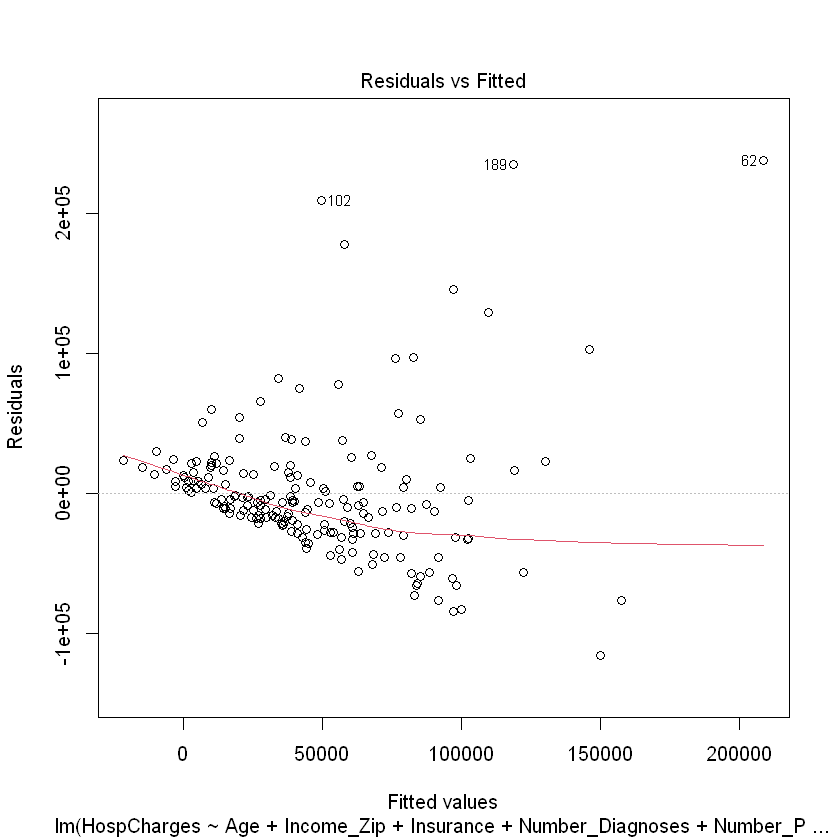

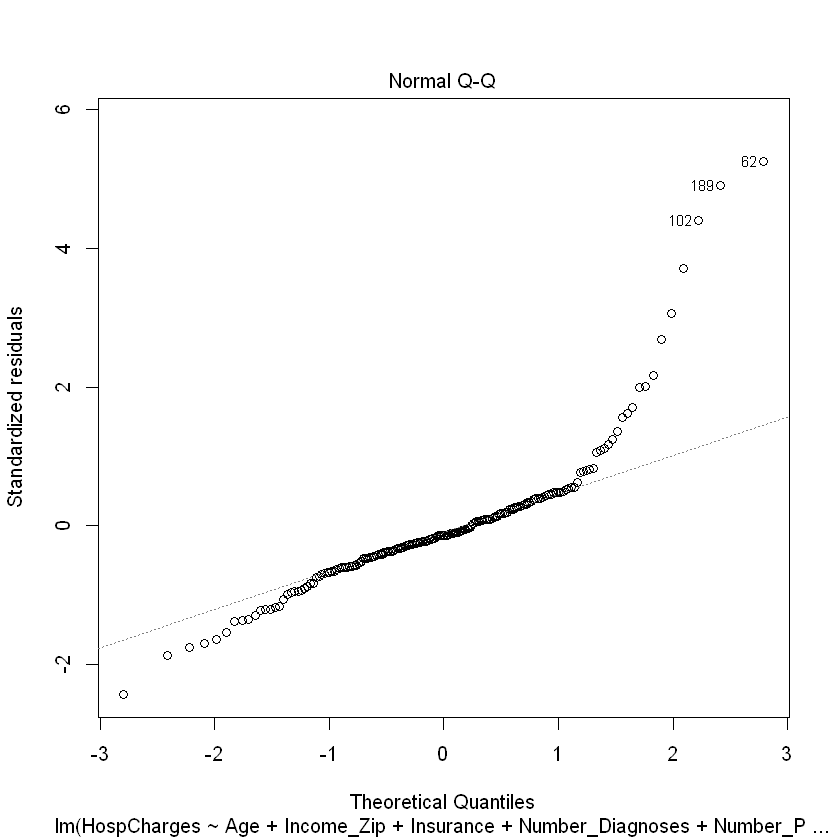

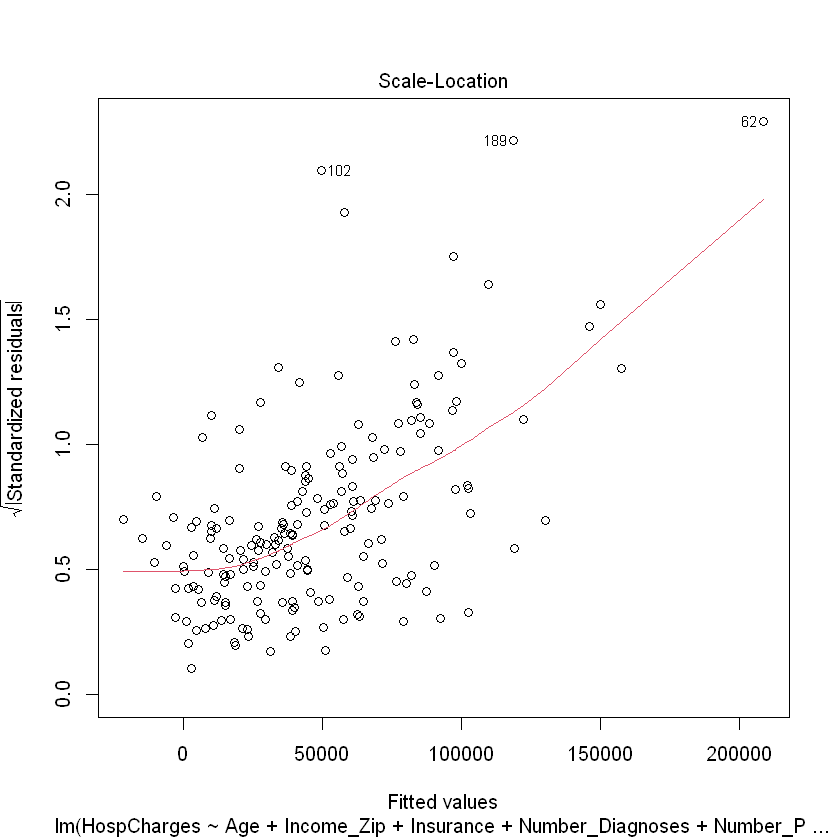

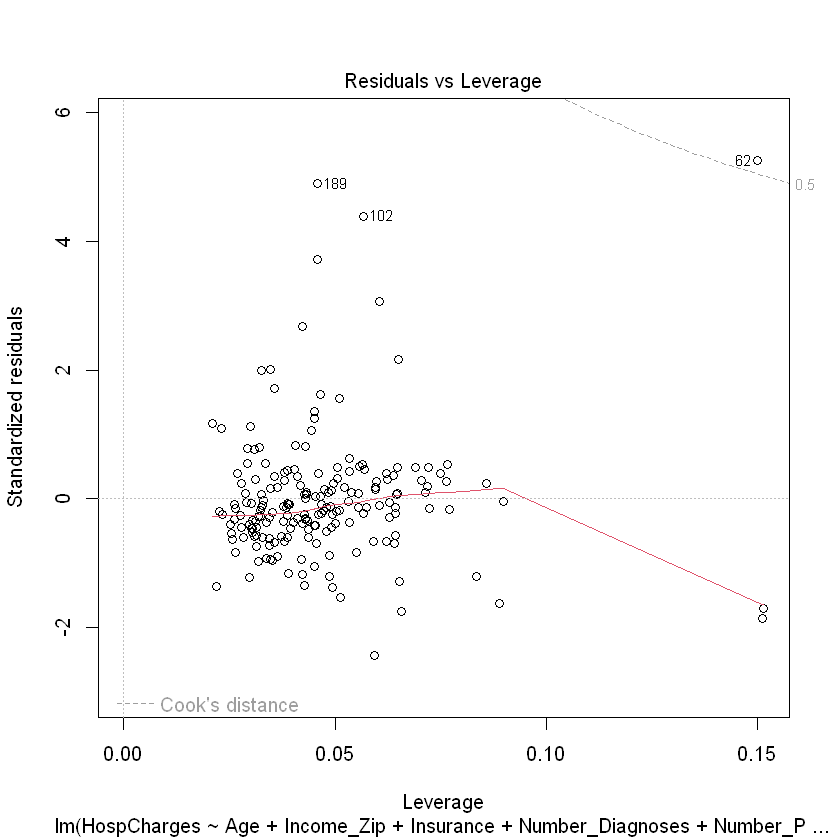

In [96]:
plot(mod1)

The model's residuals visualizations suggest that the relationship between our dependent variables and predictor variables is not linear. There are a number of things that we can do to reduce our identified issues with the first model

In [130]:
# Removing outliers above the value of the upper fence
df <- df[df$HospCharges <= upper.fence, ]

In [131]:
ind <- df |> select(-c('HospCharges','Weight'))

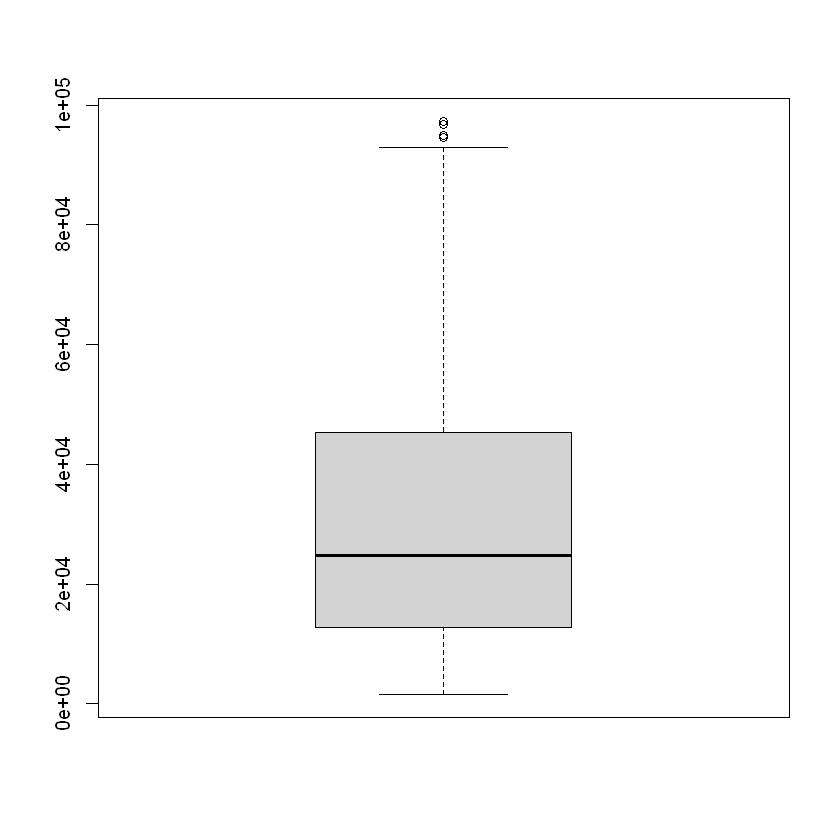

In [132]:
boxplot(df$HospCharges)

This dependent variable distribution has fewer outliers.

In [133]:
cor_mat(ind,method='spearman')

,rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,0.120,-0.3800,0.590,-0.250,-0.2500,-0.099,0.011
2,Income_Zip,0.120,1.000,0.0810,-0.043,-0.053,-0.0470,0.076,-0.350
3,Insurance,-0.380,0.081,1.0000,-0.480,0.066,-0.0033,0.010,-0.024
4,Number_Diagnoses,0.590,-0.043,-0.4800,1.000,-0.076,-0.1300,-0.039,0.016
5,Number_Procedures,-0.250,-0.053,0.0660,-0.076,1.000,0.0840,0.120,-0.110
6,Race,-0.250,-0.047,-0.0033,-0.130,0.084,1.0000,0.058,-0.190
7,Sex,-0.099,0.076,0.0100,-0.039,0.120,0.0580,1.000,-0.036
8,Urban_Rural,0.011,-0.350,-0.0240,0.016,-0.110,-0.1900,-0.036,1.000


In [134]:
cor_get_pval(cor_mat(ind,method='spearman'))

rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.00e+00,1.12e-01,1.90e-07,3.82e-18,0.000656,0.000683,0.185,8.83e-01
Income_Zip,1.12e-01,0.00e+00,2.81e-01,5.72e-01,0.481000,0.533000,0.314,1.49e-06
Insurance,1.90e-07,2.81e-01,0.00e+00,8.48e-12,0.376000,0.965000,0.894,7.46e-01
Number_Diagnoses,3.82e-18,5.72e-01,8.48e-12,0.00e+00,0.312000,0.081900,0.604,8.29e-01
Number_Procedures,6.56e-04,4.81e-01,3.76e-01,3.12e-01,0.000000,0.265000,0.101,1.38e-01
Race,6.83e-04,5.33e-01,9.65e-01,8.19e-02,0.265000,0.000000,0.439,1.32e-02
Sex,1.85e-01,3.14e-01,8.94e-01,6.04e-01,0.101000,0.439000,0.000,6.32e-01
Urban_Rural,8.83e-01,1.49e-06,7.46e-01,8.29e-01,0.138000,0.013200,0.632,0.00e+00


Noting significant inter-correlations among ind. variables. 

---

## Revise your regression model to address the assumptions that are not met and describe the steps you took. At the very least, the three items in the above paragraph must be addressed.  Describe how the new output differs from the original model.

In [135]:
# Model 2 will show us how much the outlier removal helps the model
mod2 <- lm(HospCharges ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df,weights = Weight)

In [136]:
summary(mod2)


Call:
lm(formula = HospCharges ~ Age + Income_Zip + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df, 
    weights = Weight)

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-85563 -28173  -6566  21746 137274 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5959.4    12990.8  -0.459 0.647019    
Age                  274.3       75.4   3.638 0.000366 ***
Income_Zip           866.9     1605.5   0.540 0.589979    
Insurance           1151.2     3764.4   0.306 0.760138    
Number_Diagnoses     695.6      297.2   2.340 0.020463 *  
Number_Procedures   5346.8      919.6   5.814 3.05e-08 ***
Race                4058.8     3537.1   1.147 0.252828    
Sex                -4705.4     3207.1  -1.467 0.144213    
Urban_Rural         1121.6     4440.5   0.253 0.800907    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46800 on 166 degrees of freedom
  (6 obs

In [174]:
a <- "Model 2 "
paste(a,'R-square: ',round(summary(mod2)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod2)$adj.r.squared, digits=3))

[1] "Model 2  R-square:  0.302"

[1] "Model 2  Adjusted R-square:  0.268"

In [175]:
paste(a)
data.frame(vif(mod2))

[1] "Model 2 "

,vif.mod2.
,<dbl>
Age,1.715831
Income_Zip,1.192973
Insurance,1.321873
Number_Diagnoses,1.725488
Number_Procedures,1.057533
Race,1.135007
Sex,1.021676
Urban_Rural,1.205459


[1] "Model 2 "

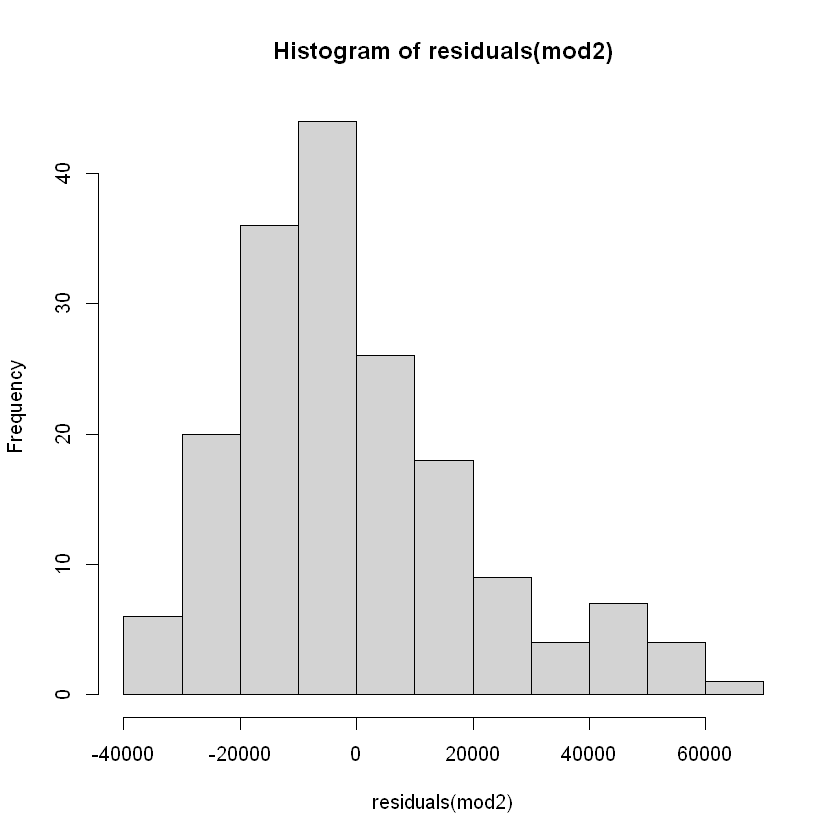

In [176]:
paste(a)
hist(residuals(mod2))

[1] "Model 2 "

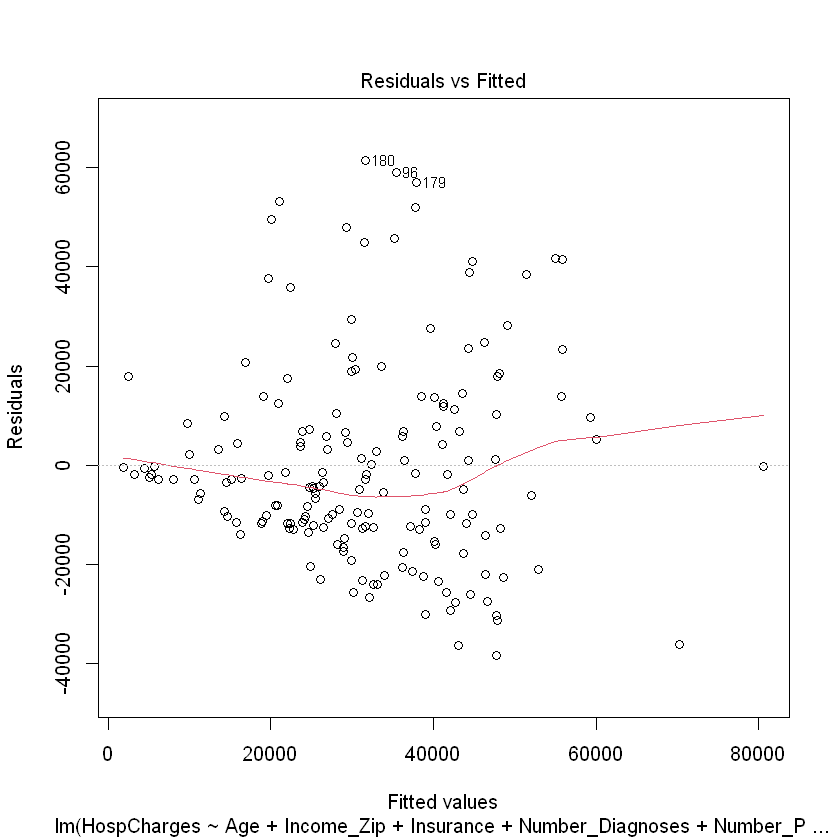

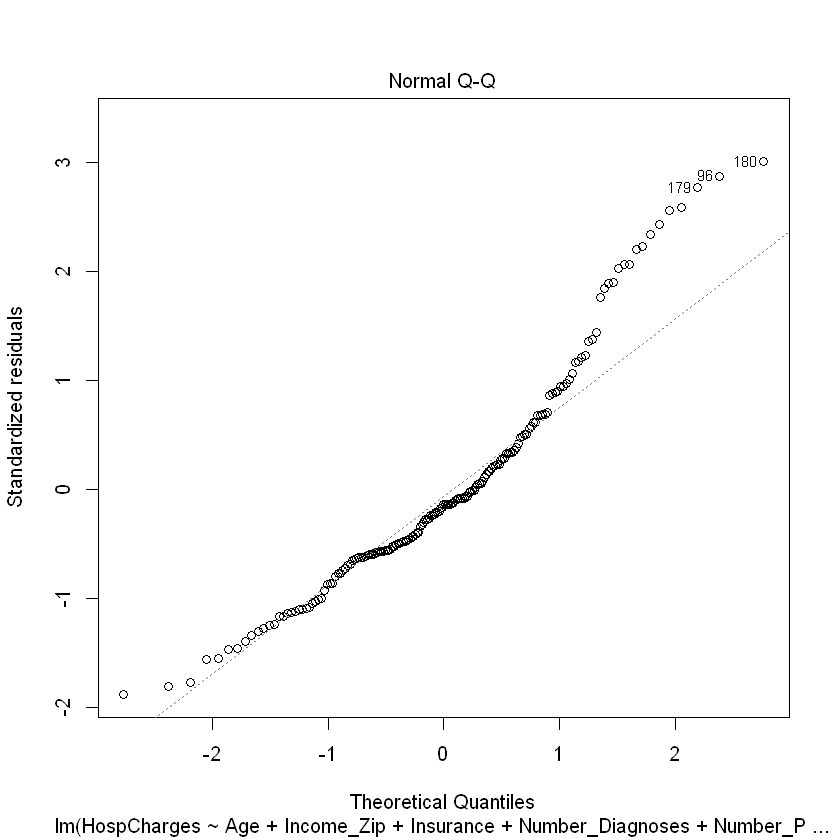

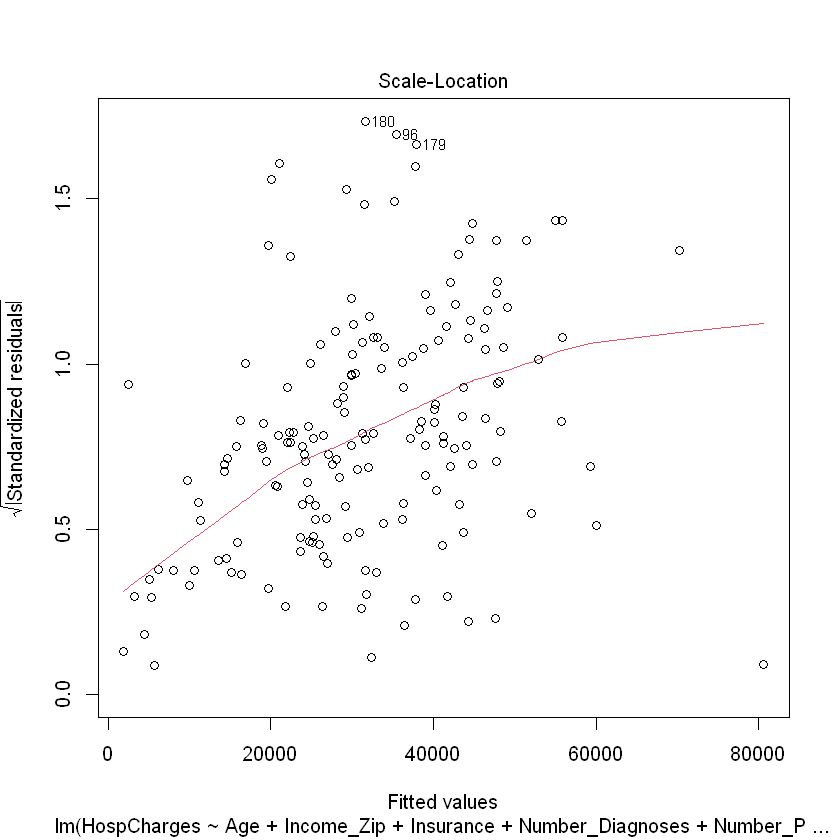

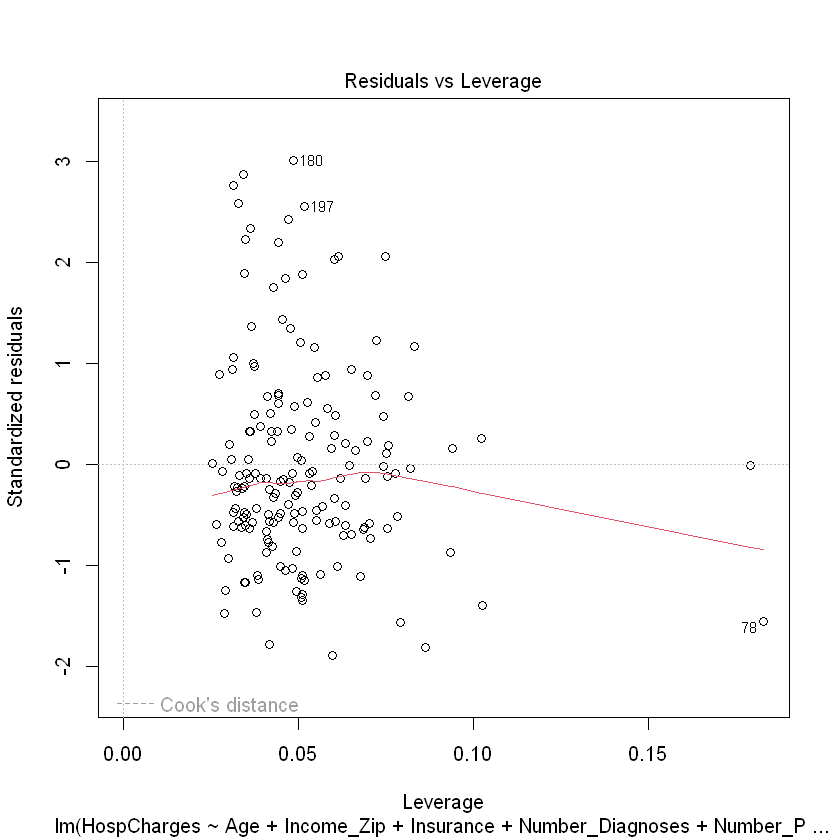

In [177]:
paste(a)
plot(mod2)

While removing outliers helped the model somewhat, we still see abnormally shaped residuals. Let's try transforming our dependent variable by taking the square root

In [180]:
mod3 <- lm(sqrt(HospCharges) ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df,weights = Weight)

In [181]:
summary(mod3)


Call:
lm(formula = sqrt(HospCharges) ~ Age + Income_Zip + Insurance + 
    Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural, 
    data = df, weights = Weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-268.75  -77.41  -17.07   75.71  315.49 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        48.2061    34.5263   1.396  0.16451    
Age                 0.9351     0.2004   4.667 6.28e-06 ***
Income_Zip          1.1602     4.2671   0.272  0.78604    
Insurance           6.9657    10.0050   0.696  0.48726    
Number_Diagnoses    2.1808     0.7900   2.760  0.00642 ** 
Number_Procedures  14.2385     2.4442   5.825 2.88e-08 ***
Race               13.2523     9.4006   1.410  0.16049    
Sex                -9.8044     8.5236  -1.150  0.25169    
Urban_Rural        -1.3381    11.8018  -0.113  0.90987    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 124.4 on 166 degrees of 

In [183]:
a
data.frame(vif(mod3))

[1] "Model 3 "

,vif.mod3.
,<dbl>
Age,1.715831
Income_Zip,1.192973
Insurance,1.321873
Number_Diagnoses,1.725488
Number_Procedures,1.057533
Race,1.135007
Sex,1.021676
Urban_Rural,1.205459


[1] "Model 3 "

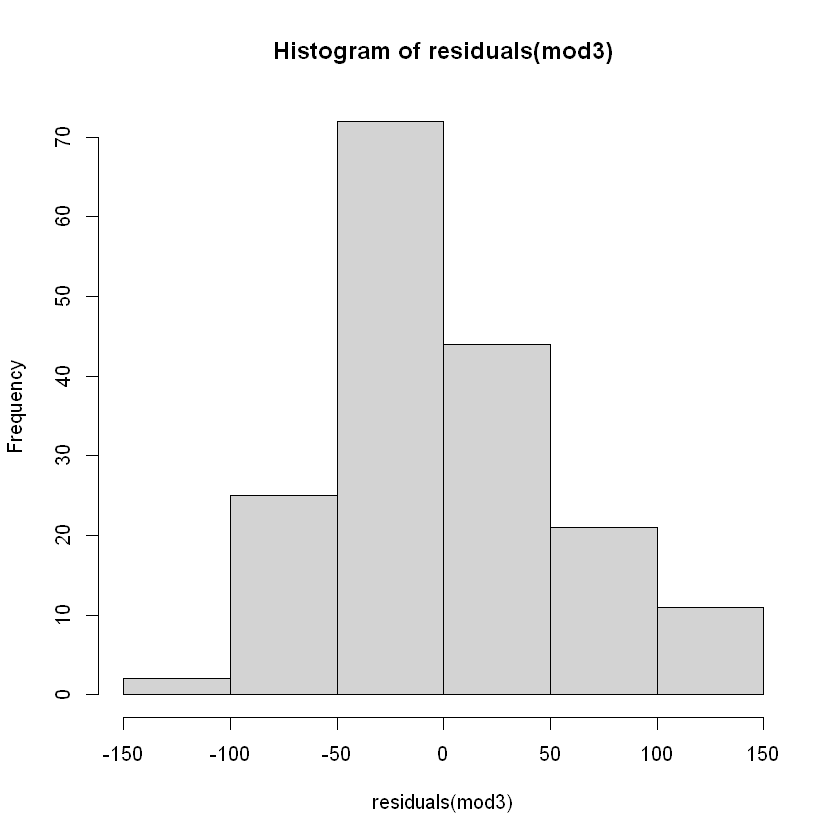

In [184]:
a
hist(residuals(mod3))

[1] "Model 3 "

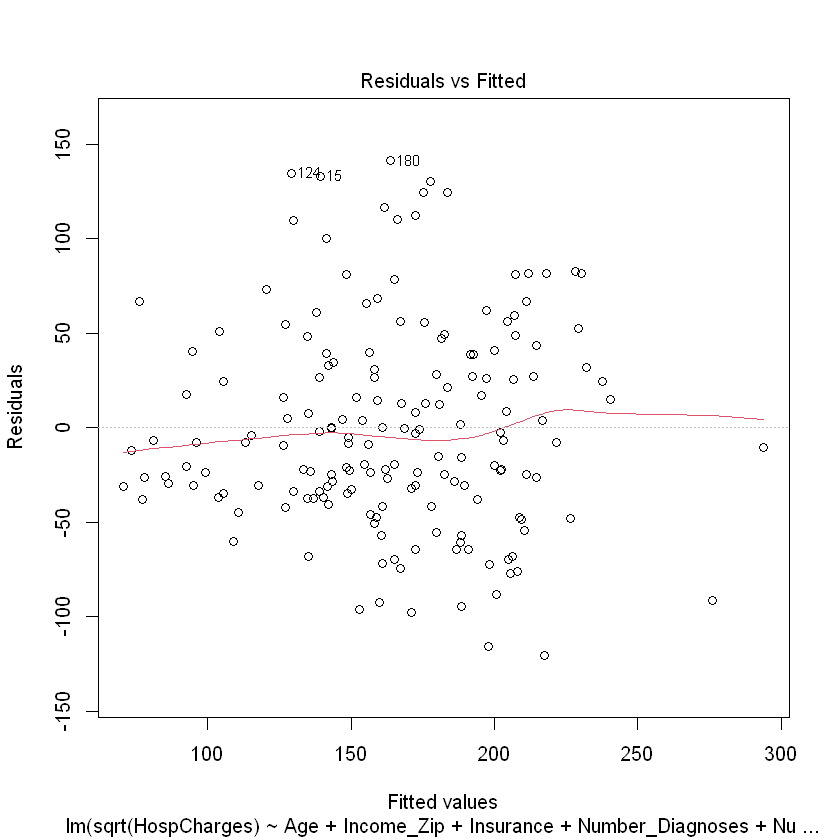

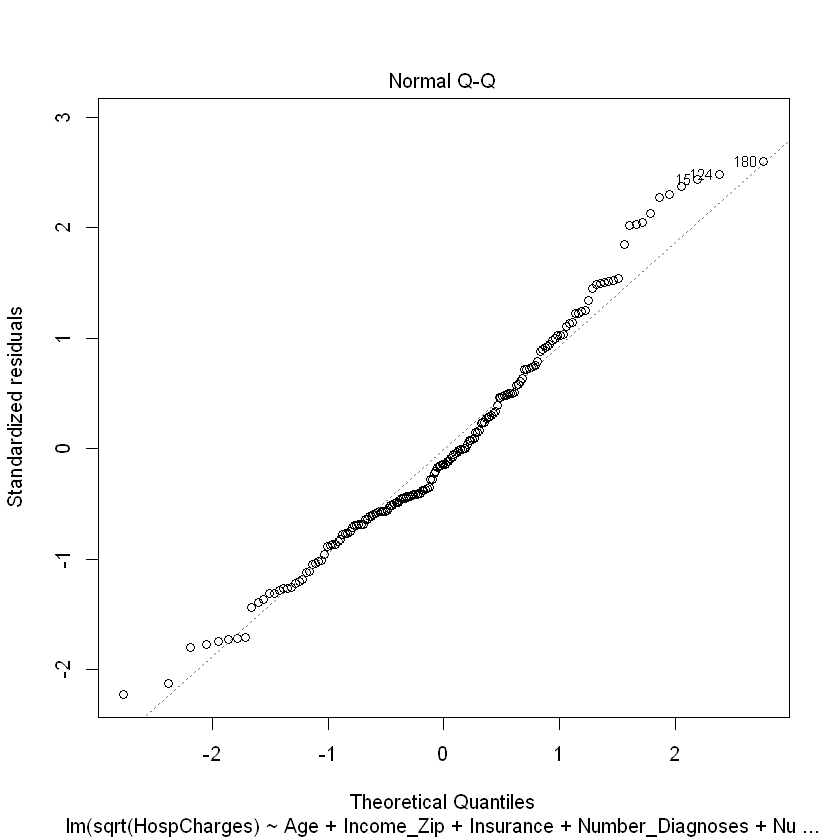

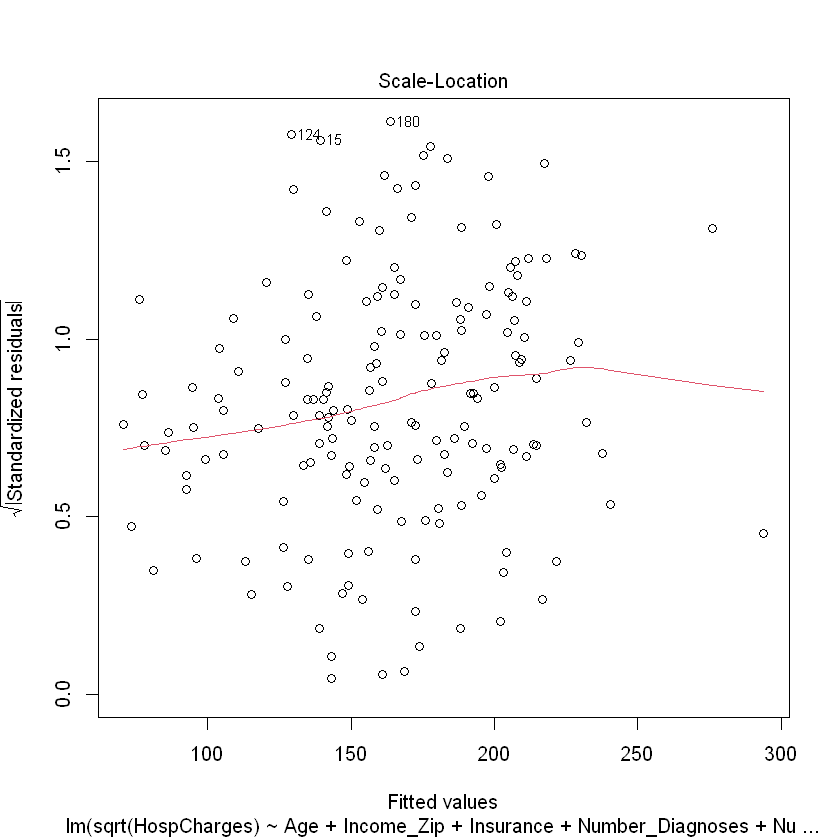

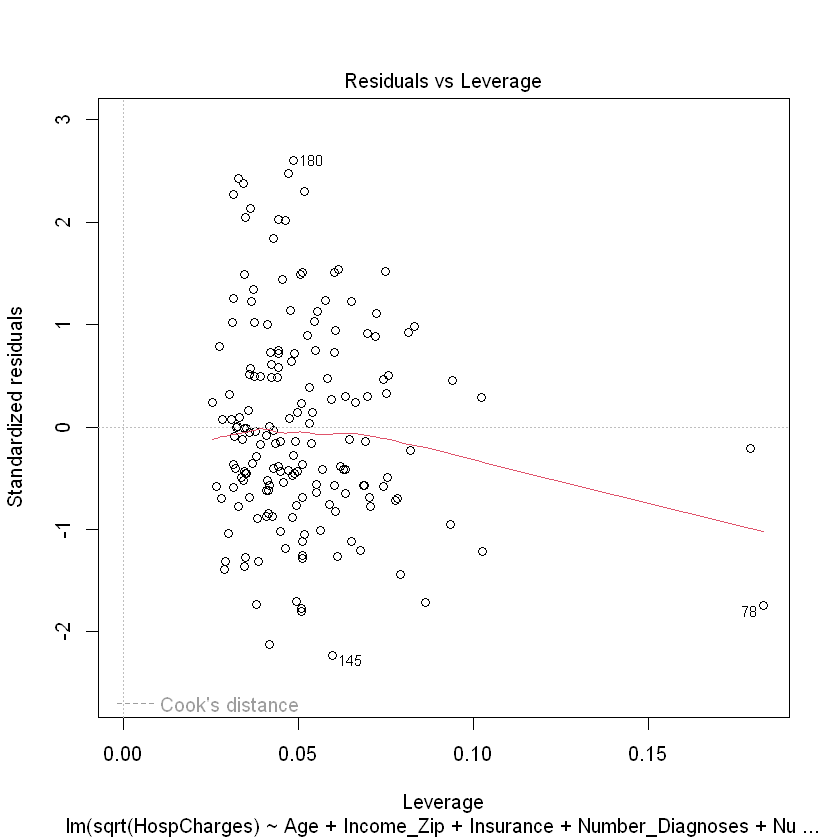

In [185]:
a
plot(mod3)

In [298]:
cor_mat(select(df, 
c( Age , 
Income_Zip , 
Insurance , 
Number_Diagnoses ,
Number_Procedures , 
Race , 
Sex , 
Urban_Rural)),
method='spearman')

,rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,0.120,-0.3800,0.590,-0.250,-0.2500,-0.099,0.011
2,Income_Zip,0.120,1.000,0.0810,-0.043,-0.053,-0.0470,0.076,-0.350
3,Insurance,-0.380,0.081,1.0000,-0.480,0.066,-0.0033,0.010,-0.024
4,Number_Diagnoses,0.590,-0.043,-0.4800,1.000,-0.076,-0.1300,-0.039,0.016
5,Number_Procedures,-0.250,-0.053,0.0660,-0.076,1.000,0.0840,0.120,-0.110
6,Race,-0.250,-0.047,-0.0033,-0.130,0.084,1.0000,0.058,-0.190
7,Sex,-0.099,0.076,0.0100,-0.039,0.120,0.0580,1.000,-0.036
8,Urban_Rural,0.011,-0.350,-0.0240,0.016,-0.110,-0.1900,-0.036,1.000


In [182]:
a <- "Model 3 "
paste(a,'R-square: ',round(summary(mod3)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod3)$adj.r.squared, digits=3))

[1] "Model 3  R-square:  0.356"

[1] "Model 3  Adjusted R-square:  0.325"

This model is better, but still looks kinda curvy. Let's try doing the natural log instead of the square root.


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Insurance + 
    Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural, 
    data = df, weights = Weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.1855 -0.9949 -0.0447  1.1257  3.6656 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.281258   0.443654  18.666  < 2e-16 ***
Age                0.015029   0.002575   5.837 2.73e-08 ***
Income_Zip        -0.002842   0.054831  -0.052  0.95872    
Insurance          0.156659   0.128561   1.219  0.22474    
Number_Diagnoses   0.031612   0.010151   3.114  0.00217 ** 
Number_Procedures  0.173273   0.031407   5.517 1.30e-07 ***
Race               0.223349   0.120795   1.849  0.06624 .  
Sex               -0.077040   0.109526  -0.703  0.48280    
Urban_Rural       -0.086936   0.151650  -0.573  0.56724    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.598 on 166 de

,vif.mod4.
,<dbl>
Age,1.715831
Income_Zip,1.192973
Insurance,1.321873
Number_Diagnoses,1.725488
Number_Procedures,1.057533
Race,1.135007
Sex,1.021676
Urban_Rural,1.205459


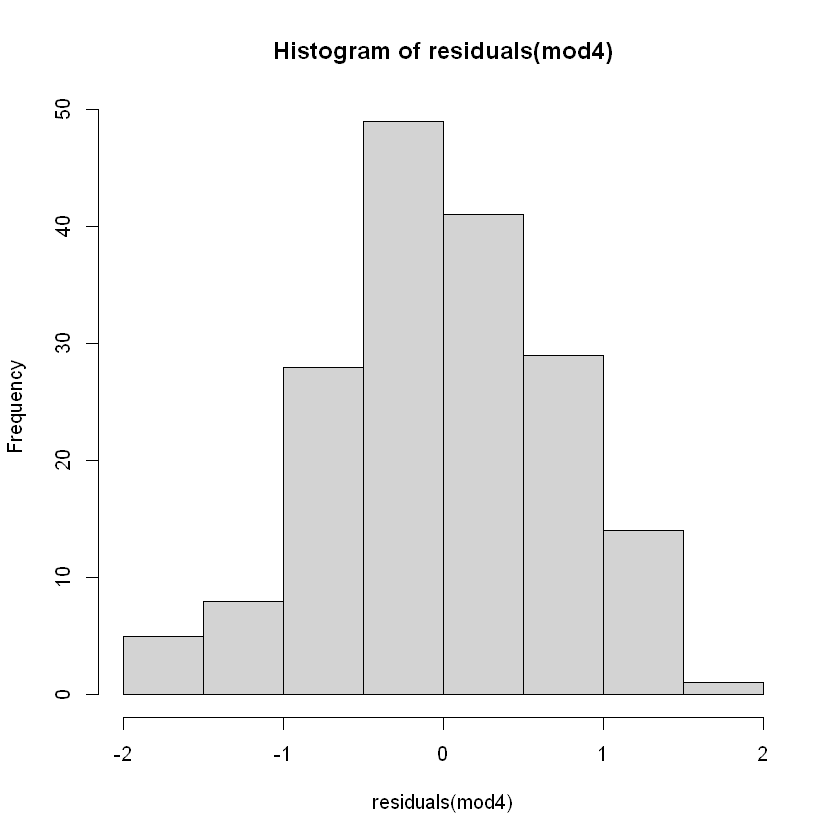

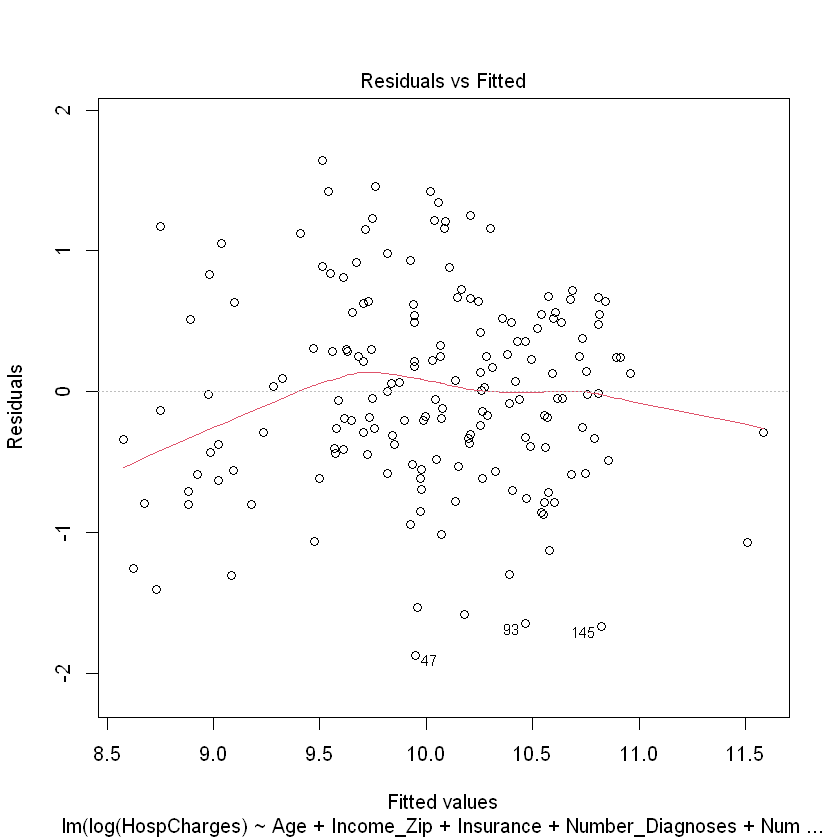

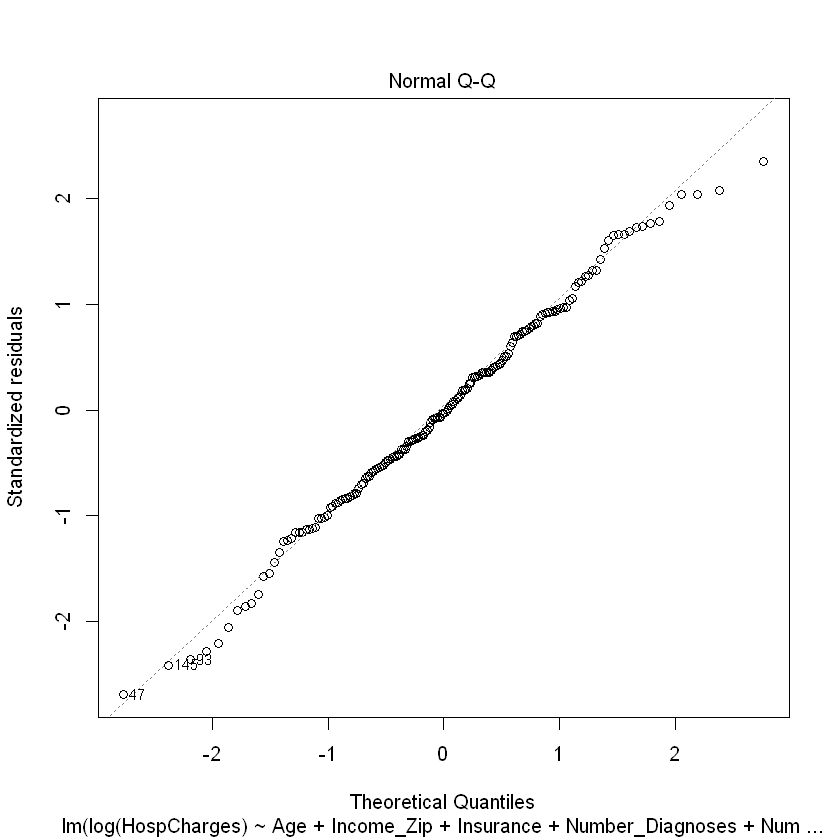

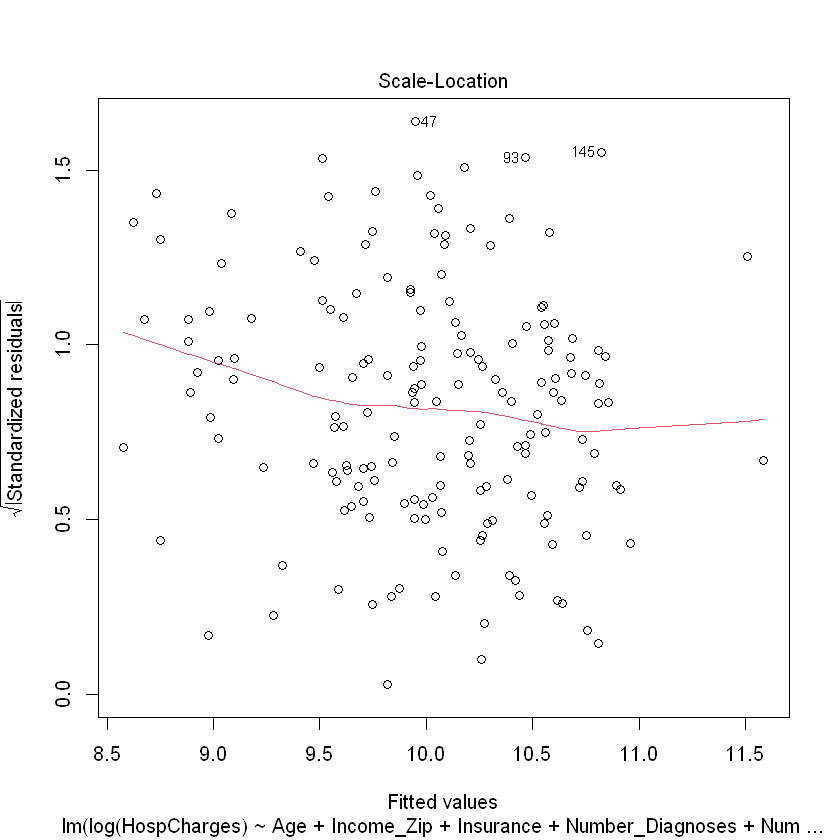

,rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,0.120,-0.3800,0.590,-0.250,-0.2500,-0.099,0.011
2,Income_Zip,0.120,1.000,0.0810,-0.043,-0.053,-0.0470,0.076,-0.350
3,Insurance,-0.380,0.081,1.0000,-0.480,0.066,-0.0033,0.010,-0.024
4,Number_Diagnoses,0.590,-0.043,-0.4800,1.000,-0.076,-0.1300,-0.039,0.016
5,Number_Procedures,-0.250,-0.053,0.0660,-0.076,1.000,0.0840,0.120,-0.110
6,Race,-0.250,-0.047,-0.0033,-0.130,0.084,1.0000,0.058,-0.190
7,Sex,-0.099,0.076,0.0100,-0.039,0.120,0.0580,1.000,-0.036
8,Urban_Rural,0.011,-0.350,-0.0240,0.016,-0.110,-0.1900,-0.036,1.000


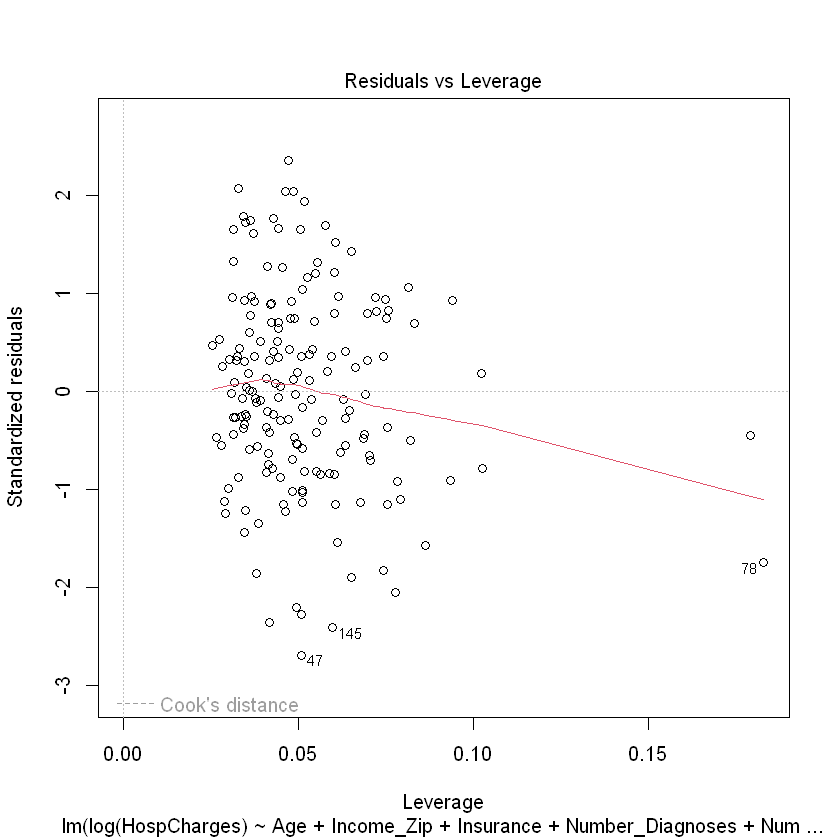

In [299]:
mod4 <- lm(log(HospCharges) ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df,weights = Weight)
summary(mod4)
data.frame(vif(mod4))
hist(residuals(mod4))
plot(mod4)
cor_mat(select(df, 
c( Age , 
Income_Zip , 
Insurance , 
Number_Diagnoses ,
Number_Procedures , 
Race , 
Sex , 
Urban_Rural)),
method='spearman')

In [191]:
a <- "Model 4 "
paste(a,'R-square: ',round(summary(mod4)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod4)$adj.r.squared, digits=3))

[1] "Model 4  R-square:  0.409"

[1] "Model 4  Adjusted R-square:  0.381"

The log-transformation drastically improves the model. I think it's fair to confidently say that the dependent variable has a log-normal distribution, meaning we can create a linear model of the natural log of the dependent variable. We'll keep the log transform, and move onto dealing with collinearity among the ind. variables.

Number of diagnoses and age are highly correlated. Let's drop diagnoses and keep age.


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Insurance + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df, 
    weights = Weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.4988 -1.0570  0.0934  1.0730  3.6416 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.647041   0.438821  19.705  < 2e-16 ***
Age                0.019010   0.002293   8.292 3.53e-14 ***
Income_Zip        -0.013321   0.056135  -0.237   0.8127    
Insurance          0.028400   0.124916   0.227   0.8204    
Number_Procedures  0.178745   0.032164   5.557 1.06e-07 ***
Race               0.217539   0.123886   1.756   0.0809 .  
Sex               -0.077406   0.112342  -0.689   0.4918    
Urban_Rural       -0.088381   0.155548  -0.568   0.5707    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.639 on 167 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squar

,vif.mod5.
,<dbl>
Age,1.292836
Income_Zip,1.188480
Insurance,1.186201
Number_Procedures,1.054223
Race,1.134736
Sex,1.021675
Urban_Rural,1.205448


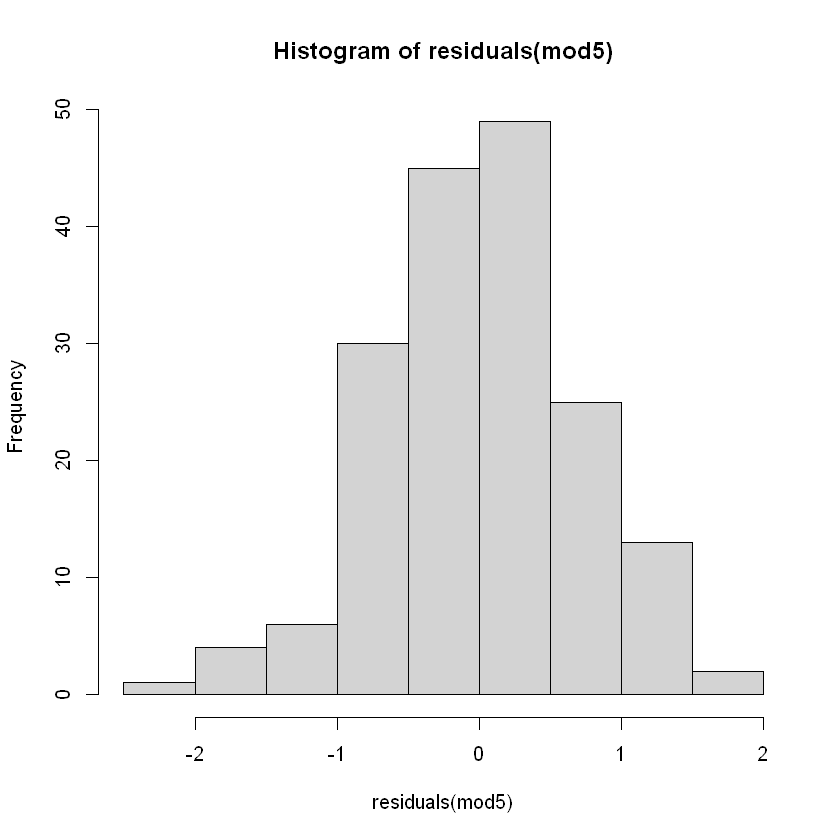

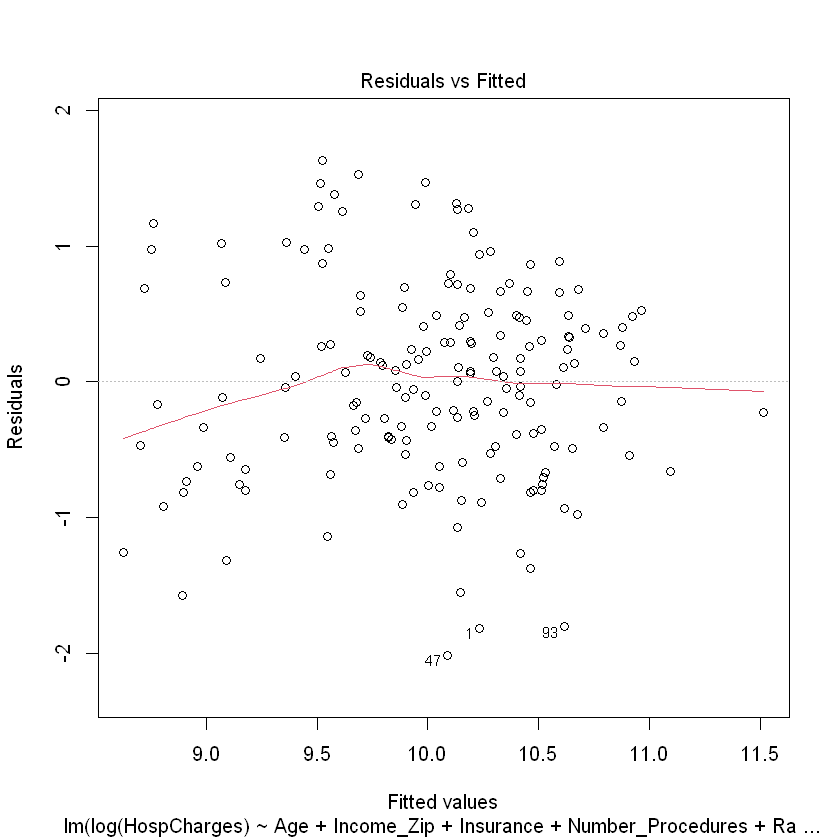

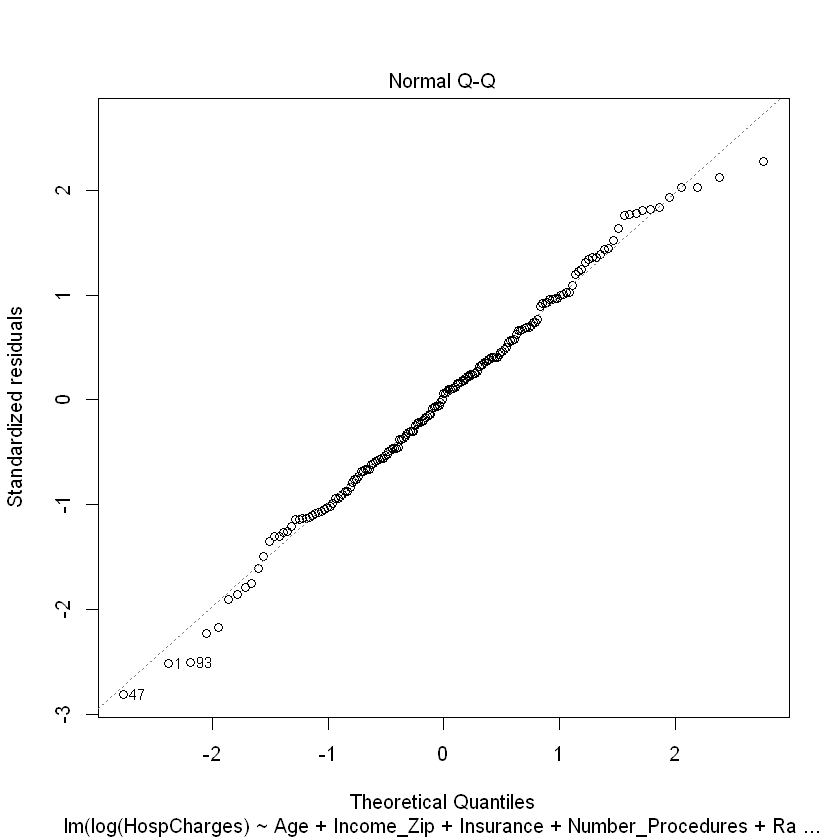

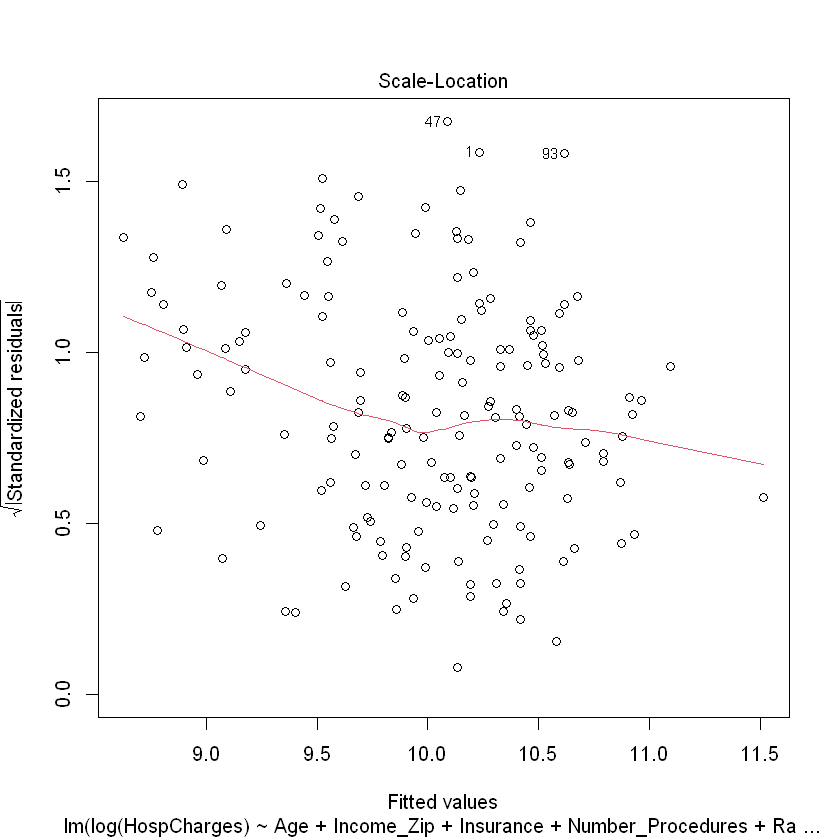

,rowname,Age,Income_Zip,Insurance,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,0.120,-0.3800,-0.250,-0.2500,-0.099,0.011
2,Income_Zip,0.120,1.000,0.0810,-0.053,-0.0470,0.076,-0.350
3,Insurance,-0.380,0.081,1.0000,0.066,-0.0033,0.010,-0.024
4,Number_Procedures,-0.250,-0.053,0.0660,1.000,0.0840,0.120,-0.110
5,Race,-0.250,-0.047,-0.0033,0.084,1.0000,0.058,-0.190
6,Sex,-0.099,0.076,0.0100,0.120,0.0580,1.000,-0.036
7,Urban_Rural,0.011,-0.350,-0.0240,-0.110,-0.1900,-0.036,1.000


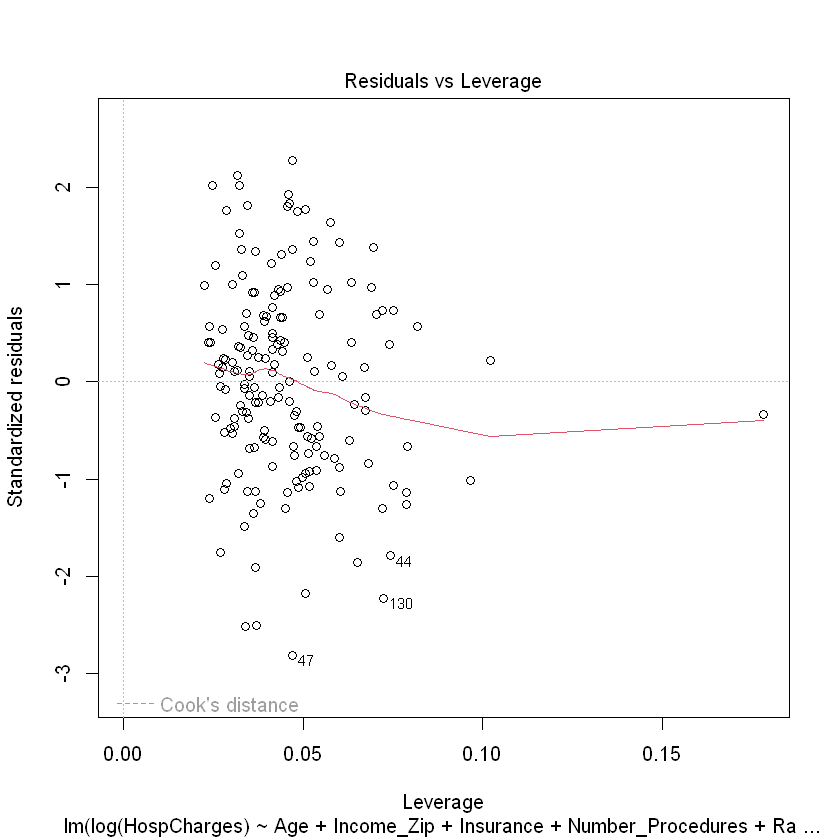

In [300]:
mod5 <- lm(log(HospCharges) ~ 
    Age + 
    Income_Zip + 
    Insurance + 
    #Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex + 
    Urban_Rural
    ,data=df
    ,weights = Weight
)
summary(mod5)
data.frame(vif(mod5))
hist(residuals(mod5))
plot(mod5)
cor_mat(select(df, 
c( Age , 
Income_Zip , 
Insurance , 
#Number_Diagnoses ,
Number_Procedures , 
Race , 
Sex , 
Urban_Rural)),
method='spearman')

In [202]:
b <- "Original log-transformed model"
paste(b,'R-square: ',round(summary(mod4)$r.squared, digits=3))
paste(b,'Adjusted R-square: ',round(summary(mod4)$adj.r.squared, digits=3))
a <- "Model 5 "
paste(a,'R-square: ',round(summary(mod5)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod5)$adj.r.squared, digits=3))

[1] "Original log-transformed model R-square:  0.409"

[1] "Original log-transformed model Adjusted R-square:  0.381"

[1] "Model 5  R-square:  0.375"

[1] "Model 5  Adjusted R-square:  0.349"


Call:
lm(formula = log(HospCharges) ~ Age + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df, 
    weights = Weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.1664 -0.9776 -0.0329  1.1112  3.6631 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.292186   0.399898  20.736  < 2e-16 ***
Age                0.014703   0.002493   5.897 1.96e-08 ***
Insurance          0.155149   0.126748   1.224  0.22263    
Number_Diagnoses   0.032237   0.010018   3.218  0.00155 ** 
Number_Procedures  0.171779   0.030895   5.560 1.03e-07 ***
Race               0.219166   0.118289   1.853  0.06566 .  
Sex               -0.078797   0.107811  -0.731  0.46586    
Urban_Rural       -0.085620   0.140829  -0.608  0.54402    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.586 on 169 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R

,vif.mod6.
,<dbl>
Age,1.661987
Insurance,1.313155
Number_Diagnoses,1.707043
Number_Procedures,1.043574
Race,1.128333
Sex,1.014813
Urban_Rural,1.058180


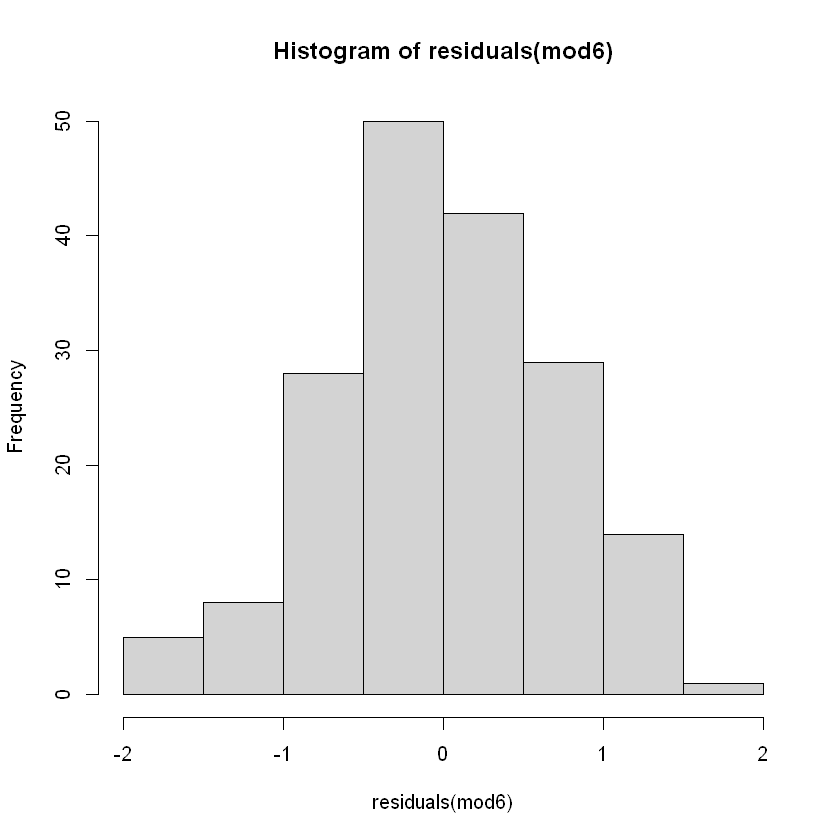

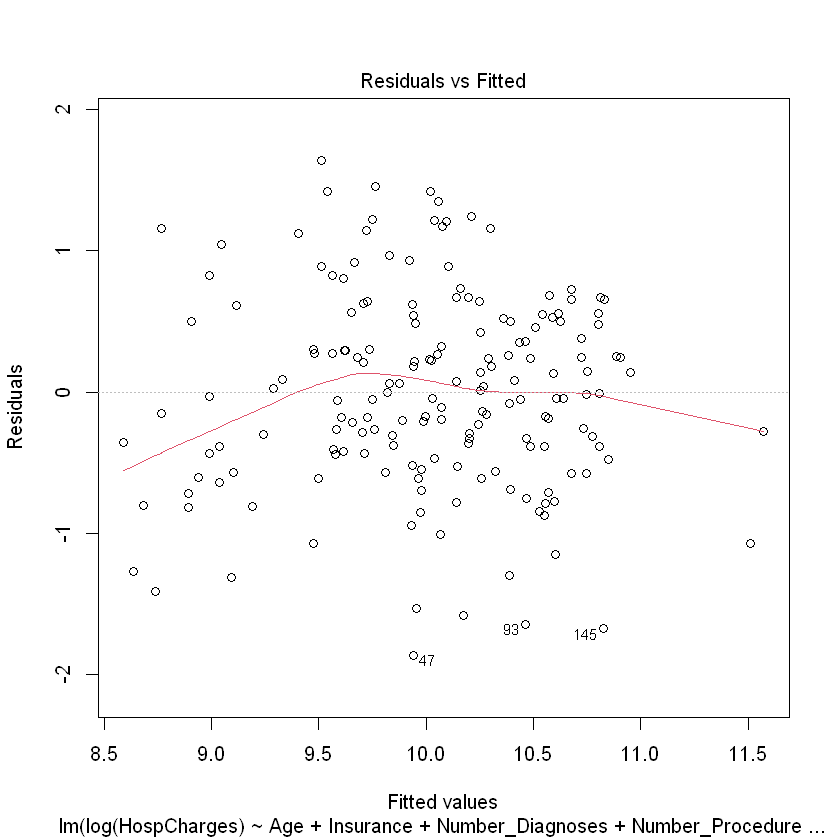

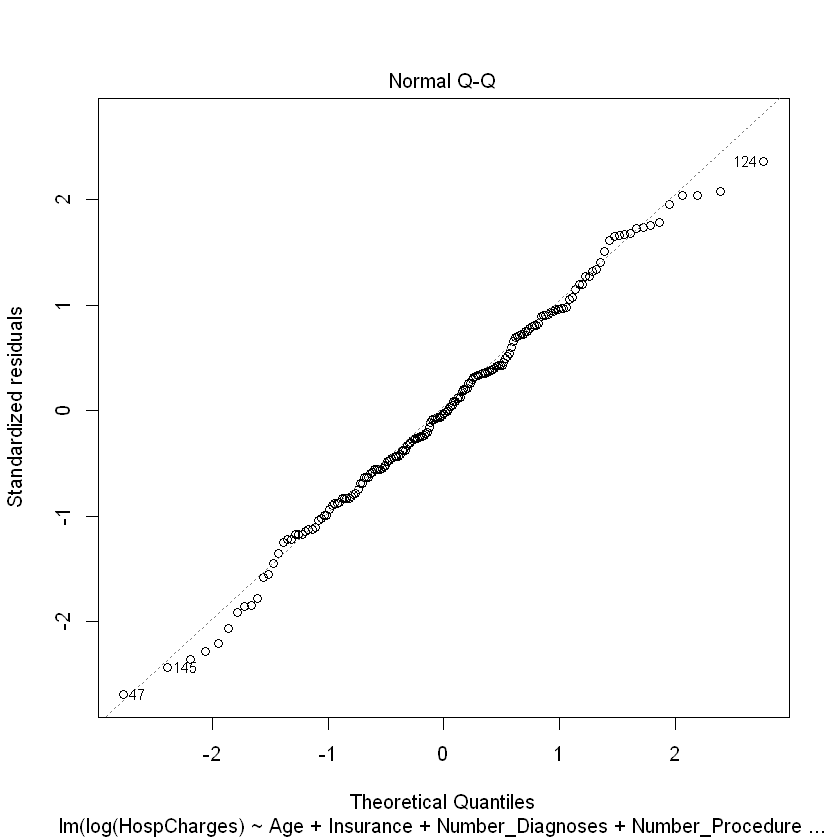

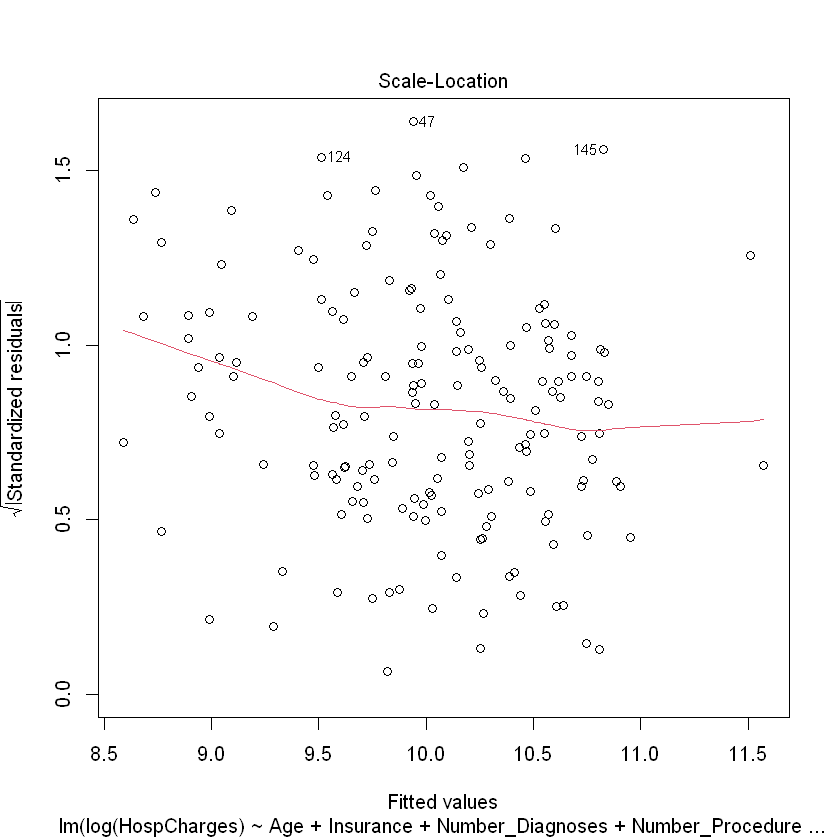

,rowname,Age,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,-0.3800,0.590,-0.250,-0.2500,-0.099,0.011
2,Insurance,-0.380,1.0000,-0.480,0.066,-0.0033,0.010,-0.024
3,Number_Diagnoses,0.590,-0.4800,1.000,-0.076,-0.1300,-0.039,0.016
4,Number_Procedures,-0.250,0.0660,-0.076,1.000,0.0840,0.120,-0.110
5,Race,-0.250,-0.0033,-0.130,0.084,1.0000,0.058,-0.190
6,Sex,-0.099,0.0100,-0.039,0.120,0.0580,1.000,-0.036
7,Urban_Rural,0.011,-0.0240,0.016,-0.110,-0.1900,-0.036,1.000


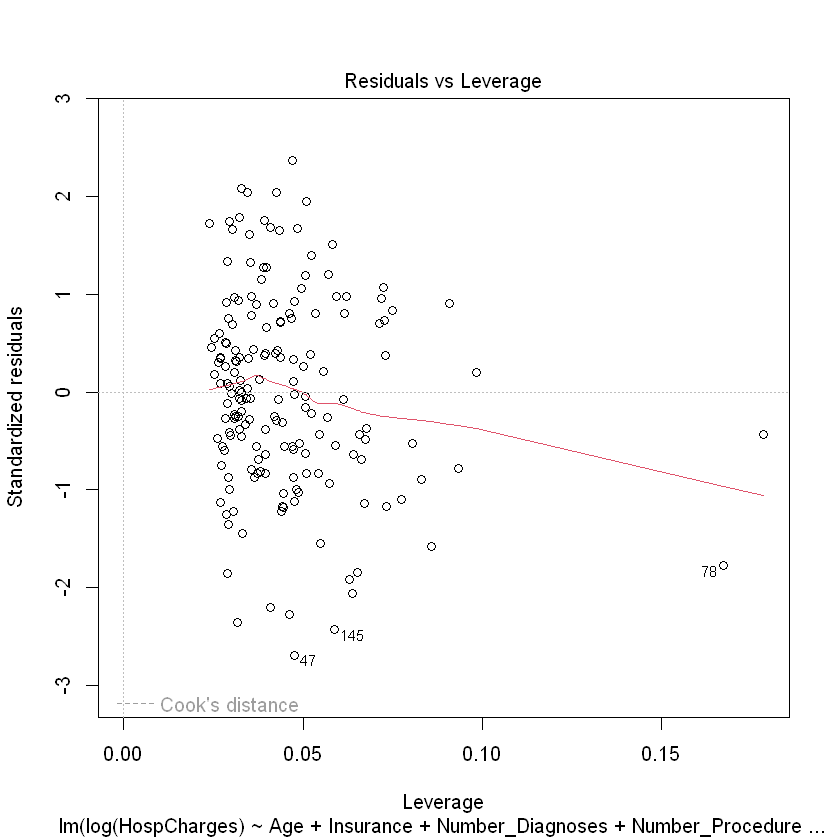

In [301]:
mod6 <- lm(log(HospCharges) ~ 
    Age + 
    #Income_Zip + 
    Insurance + 
    Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex + 
    Urban_Rural
    ,data=df
    ,weights = Weight
)
summary(mod6)
data.frame(vif(mod6))
hist(residuals(mod6))
plot(mod6)
cor_mat(select(df, 
c( Age , 
#Income_Zip , 
Insurance , 
Number_Diagnoses ,
Number_Procedures , 
Race , 
Sex , 
Urban_Rural)),
method='spearman')


In [204]:
b <- "Original log-transformed model"
paste(b,'R-square: ',round(summary(mod4)$r.squared, digits=3))
paste(b,'Adjusted R-square: ',round(summary(mod4)$adj.r.squared, digits=3))

a <- "Model 6 "
paste(a,'R-square: ',round(summary(mod6)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod6)$adj.r.squared, digits=3))

[1] "Original log-transformed model R-square:  0.409"

[1] "Original log-transformed model Adjusted R-square:  0.381"

[1] "Model 6  R-square:  0.409"

[1] "Model 6  Adjusted R-square:  0.384"


Call:
lm(formula = log(HospCharges) ~ Age + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86069 -0.46234  0.00253  0.47176  1.57387 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.156340   0.331037  24.639  < 2e-16 ***
Age                0.014848   0.002477   5.993  1.2e-08 ***
Insurance          0.159469   0.126314   1.262  0.20850    
Number_Diagnoses   0.032125   0.009998   3.213  0.00157 ** 
Number_Procedures  0.172900   0.030783   5.617  7.8e-08 ***
Race               0.234912   0.115204   2.039  0.04299 *  
Sex               -0.079947   0.107595  -0.743  0.45848    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.708 on 170 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.4074,	Adjusted R-squared:  0.3865 
F-statistic: 19.48 on 6 and 170 DF,  p-value: < 

,vif.mod7.
,<dbl>
Age,1.646908
Insurance,1.309031
Number_Diagnoses,1.706461
Number_Procedures,1.039858
Race,1.074220
Sex,1.014501


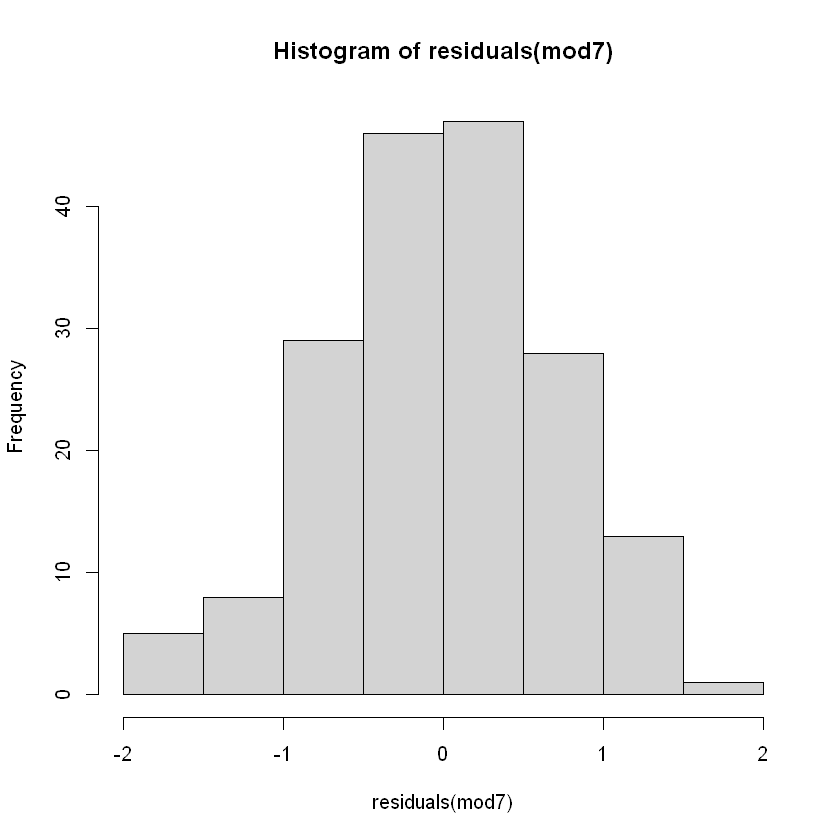

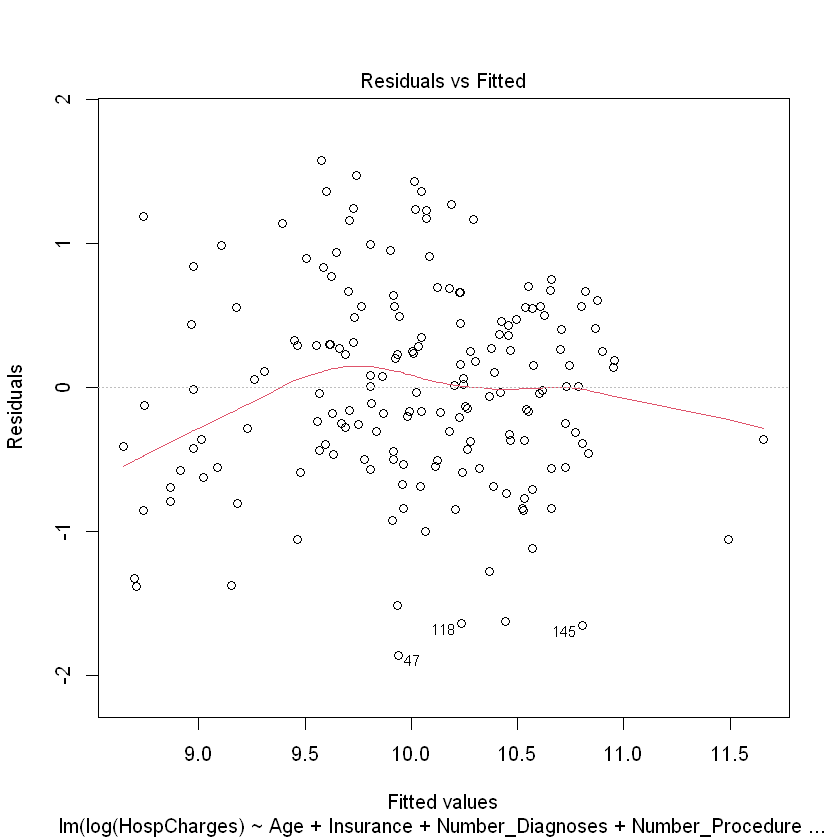

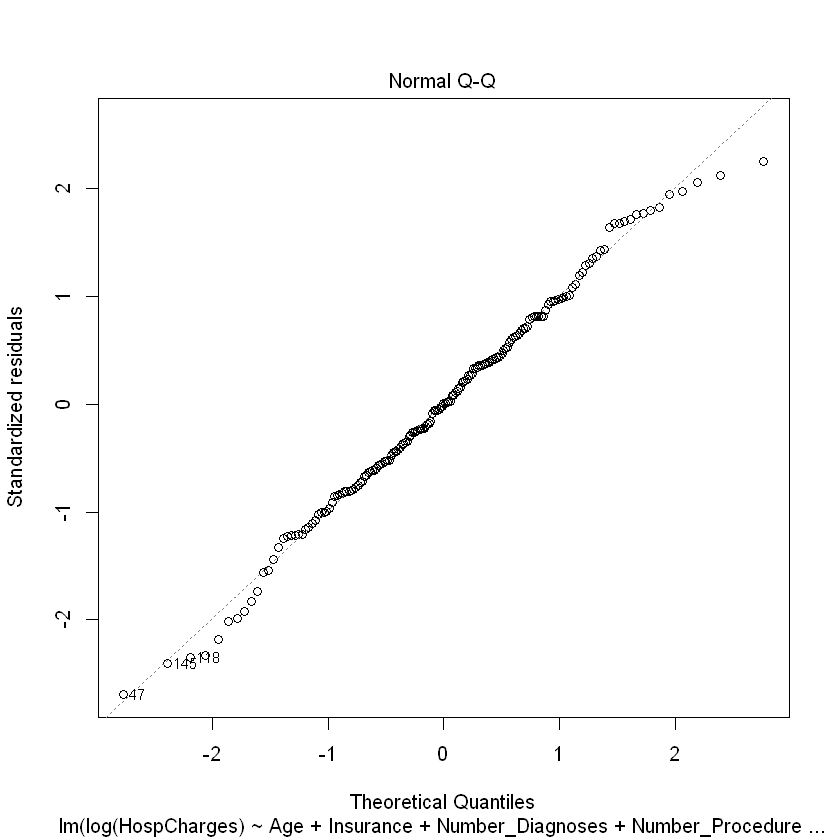

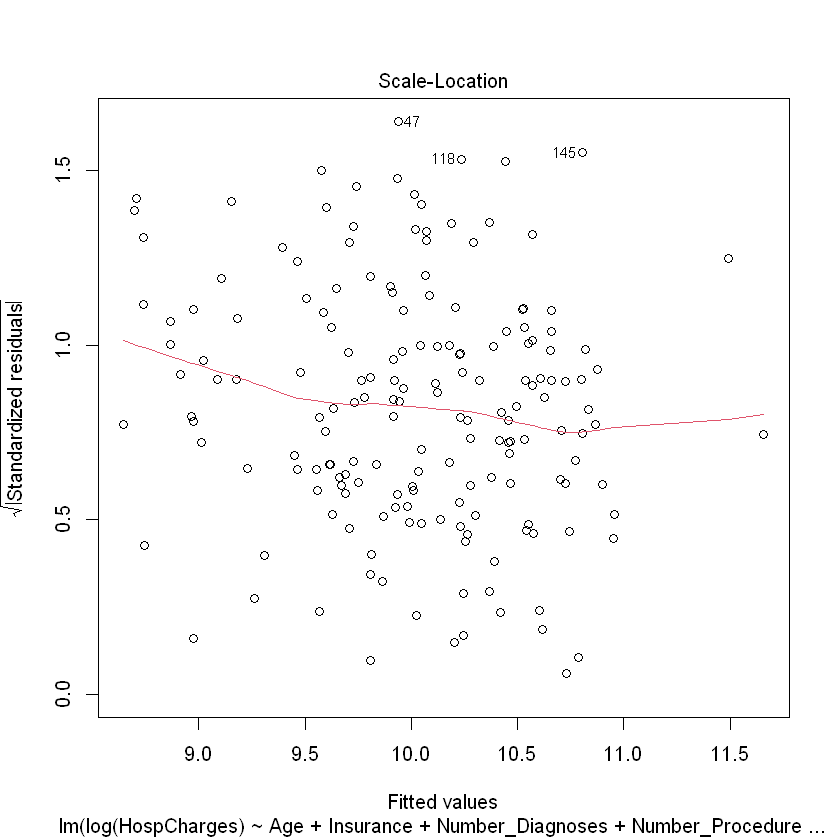

,rowname,Age,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,-0.3800,0.590,-0.250,-0.2500,-0.099
2,Insurance,-0.380,1.0000,-0.480,0.066,-0.0033,0.010
3,Number_Diagnoses,0.590,-0.4800,1.000,-0.076,-0.1300,-0.039
4,Number_Procedures,-0.250,0.0660,-0.076,1.000,0.0840,0.120
5,Race,-0.250,-0.0033,-0.130,0.084,1.0000,0.058
6,Sex,-0.099,0.0100,-0.039,0.120,0.0580,1.000


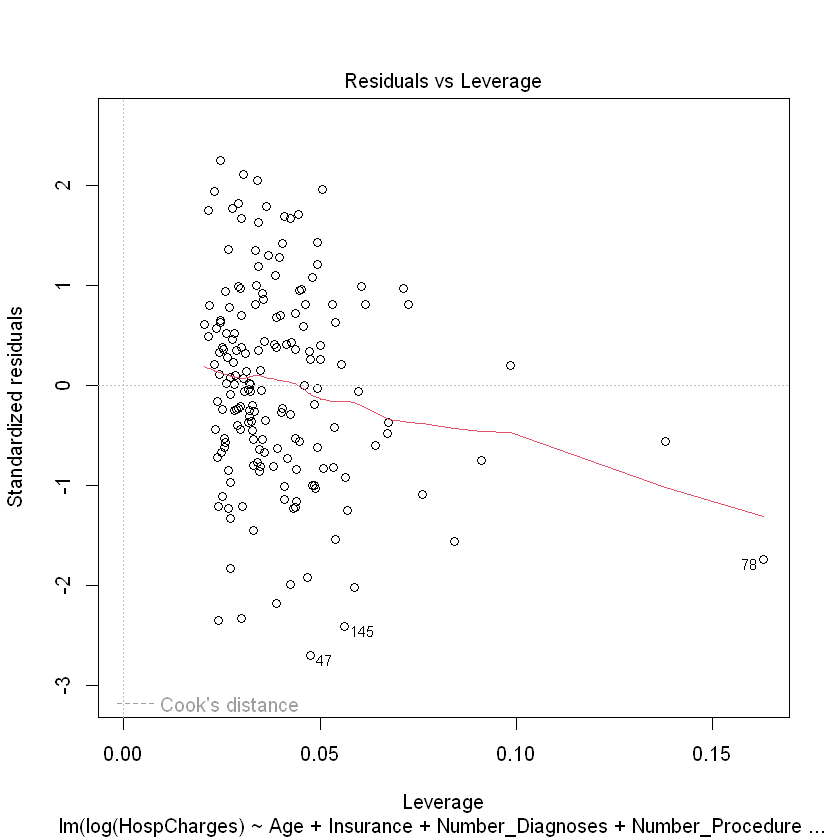

In [303]:
mod7 <- lm(log(HospCharges) ~ 
    Age + 
    #Income_Zip + 
    Insurance + 
    Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex 
    #Urban_Rural
    ,data=df
)
summary(mod7)
data.frame(vif(mod7))
hist(residuals(mod7))
plot(mod7)
cor_mat(select(df, 
c( Age , 
#Income_Zip , 
Insurance , 
Number_Diagnoses ,
Number_Procedures , 
Race , 
Sex , 
#Urban_Rural
)),
method='spearman')

In [214]:
b <- "Original log-transformed model"
paste(b,'R-square: ',round(summary(mod4)$r.squared, digits=3))
paste(b,'Adjusted R-square: ',round(summary(mod4)$adj.r.squared, digits=3))

a <- "Model 7 "
paste(a,'R-square: ',round(summary(mod7)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod7)$adj.r.squared, digits=3))

[1] "Original log-transformed model R-square:  0.409"

[1] "Original log-transformed model Adjusted R-square:  0.381"

[1] "Model 7  R-square:  0.407"

[1] "Model 7  Adjusted R-square:  0.386"


Call:
lm(formula = log(HospCharges) ~ Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df, 
    weights = Weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.5606 -1.0647  0.0703  1.2699  3.6854 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.196652   0.404345  22.745  < 2e-16 ***
Insurance          0.047325   0.137318   0.345    0.731    
Number_Diagnoses   0.061060   0.009575   6.377 1.64e-09 ***
Number_Procedures  0.146467   0.033497   4.372 2.13e-05 ***
Race               0.067363   0.126405   0.533    0.595    
Sex               -0.100009   0.117971  -0.848    0.398    
Urban_Rural       -0.164727   0.153484  -1.073    0.285    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.737 on 170 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.287,	Adjusted R-squared:  0.2618 
F-statistic:  11.4 

,vif.mod8.
,<dbl>
Insurance,1.285829
Number_Diagnoses,1.300751
Number_Procedures,1.023431
Race,1.074899
Sex,1.013683
Urban_Rural,1.048579


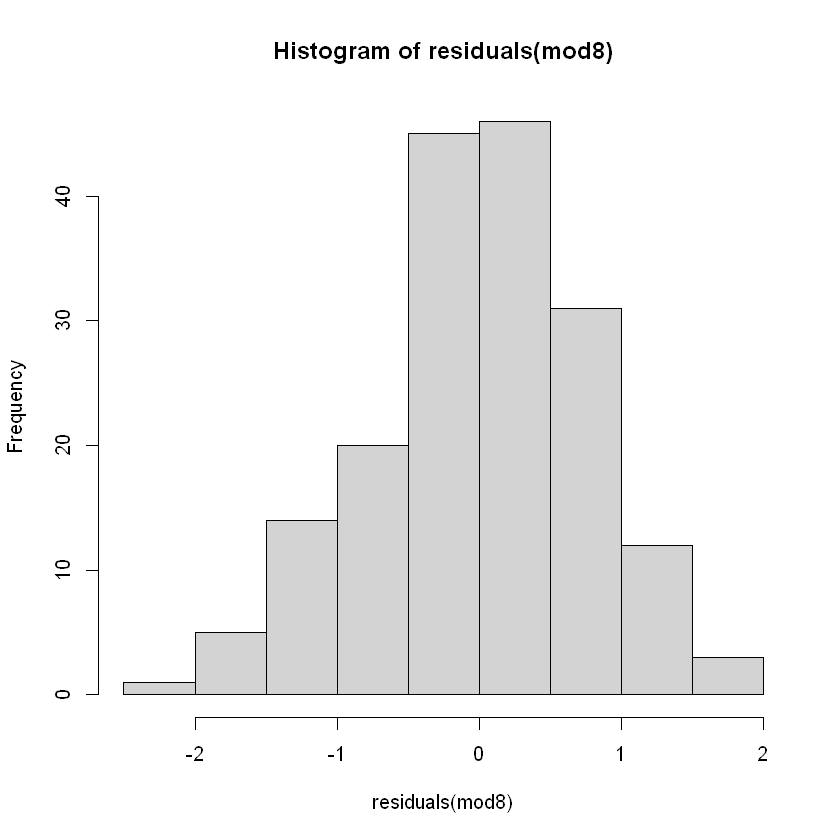

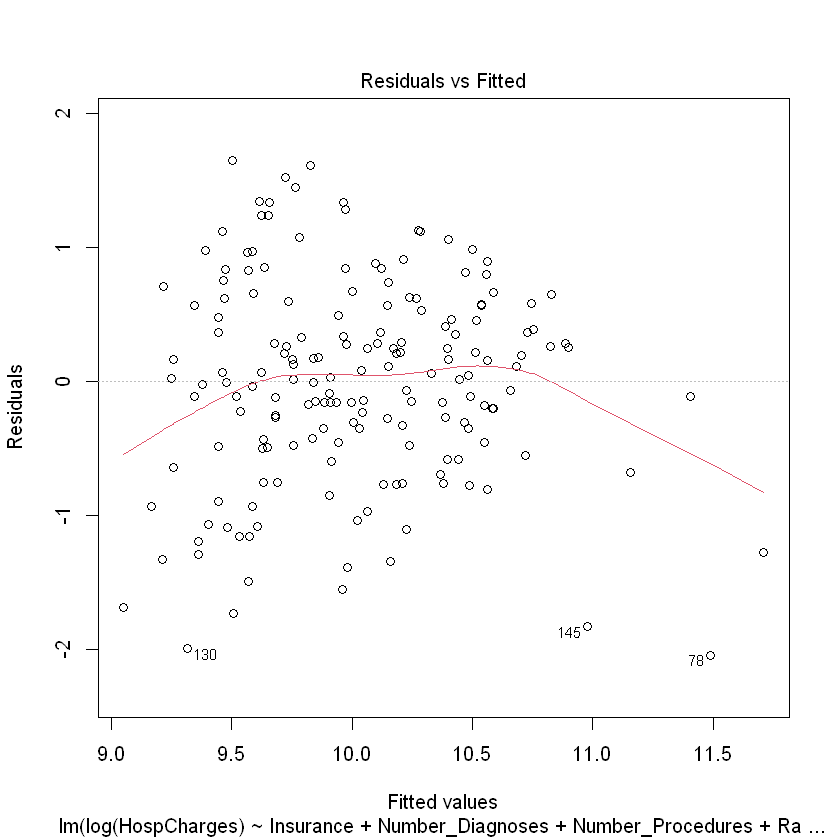

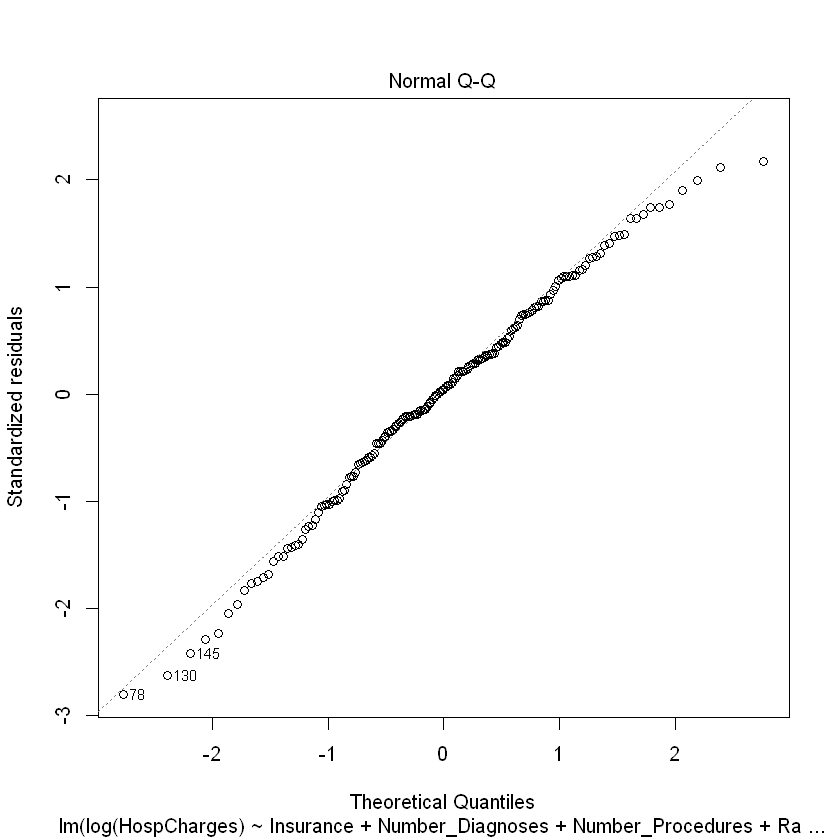

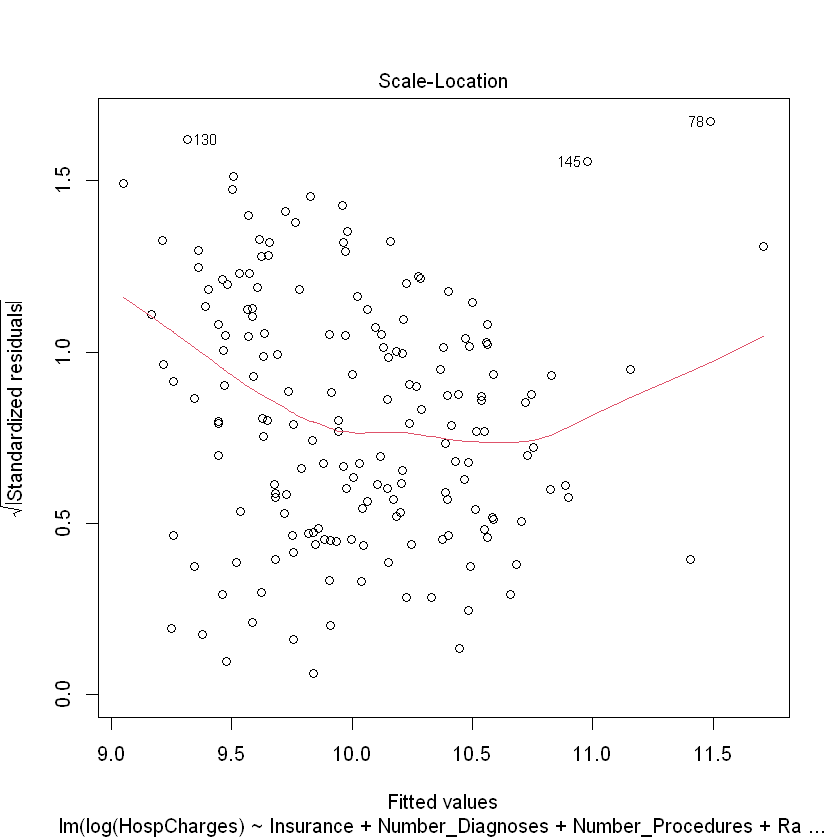

,rowname,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Insurance,1.0000,-0.480,0.066,-0.0033,0.010,-0.024
2,Number_Diagnoses,-0.4800,1.000,-0.076,-0.1300,-0.039,0.016
3,Number_Procedures,0.0660,-0.076,1.000,0.0840,0.120,-0.110
4,Race,-0.0033,-0.130,0.084,1.0000,0.058,-0.190
5,Sex,0.0100,-0.039,0.120,0.0580,1.000,-0.036
6,Urban_Rural,-0.0240,0.016,-0.110,-0.1900,-0.036,1.000


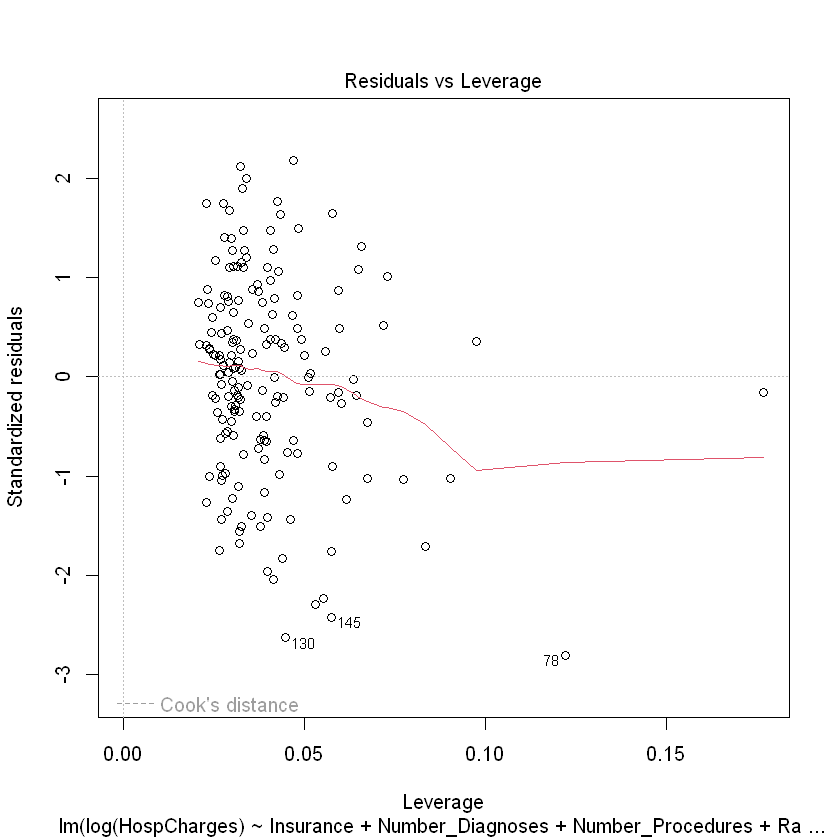

In [304]:
mod8 <- lm(log(HospCharges) ~ 
    #Age + 
    #Income_Zip + 
    Insurance + 
    Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex + 
    Urban_Rural
    ,data=df
    ,weights = Weight
)
summary(mod8)
data.frame(vif(mod8))
hist(residuals(mod8))
plot(mod8)
cor_mat(select(df, c( 
    #Age , 
    #Income_Zip , 
    Insurance , 
    Number_Diagnoses ,
    Number_Procedures , 
    Race , 
    Sex , 
    Urban_Rural
)),
method='spearman')

In [225]:
b <- "Original log-transformed model"
paste(b,'R-square: ',round(summary(mod4)$r.squared, digits=3))
paste(b,'Adjusted R-square: ',round(summary(mod4)$adj.r.squared, digits=3))

a <- "Model 8 "
paste(a,'R-square: ',round(summary(mod8)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod8)$adj.r.squared, digits=3))

[1] "Original log-transformed model R-square:  0.409"

[1] "Original log-transformed model Adjusted R-square:  0.381"

[1] "Model 8  R-square:  0.287"

[1] "Model 8  Adjusted R-square:  0.262"


Call:
lm(formula = log(HospCharges) ~ Age + Insurance + Number_Procedures + 
    Race + Sex + Urban_Rural, data = df, weights = Weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.4664 -1.0705  0.0902  1.0534  3.6354 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.641644   0.395317  21.860  < 2e-16 ***
Age                0.018618   0.002236   8.328 2.62e-14 ***
Insurance          0.020028   0.122837   0.163   0.8707    
Number_Procedures  0.177306   0.031685   5.596 8.63e-08 ***
Race               0.213464   0.121487   1.757   0.0807 .  
Sex               -0.081357   0.110735  -0.735   0.4635    
Urban_Rural       -0.077255   0.144627  -0.534   0.5939    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.629 on 170 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.3724,	Adjusted R-squared:  0.3503 
F-statistic: 16.81 on 6 and 170 DF, 

,vif.mod9.
,<dbl>
Age,1.266418
Insurance,1.169029
Number_Procedures,1.040349
Race,1.128080
Sex,1.014757
Urban_Rural,1.057820


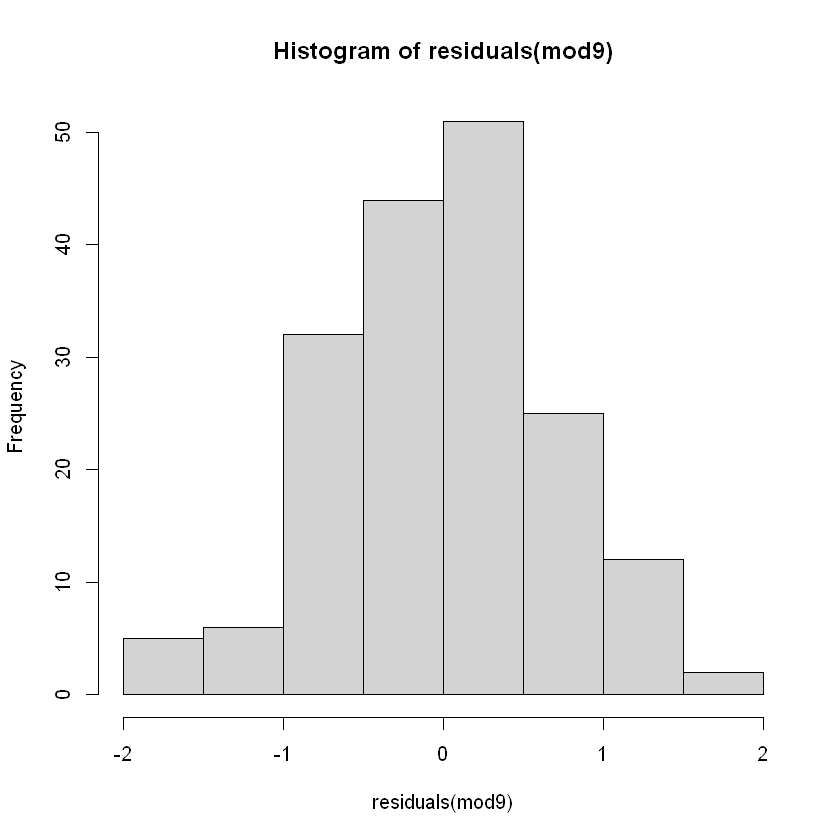

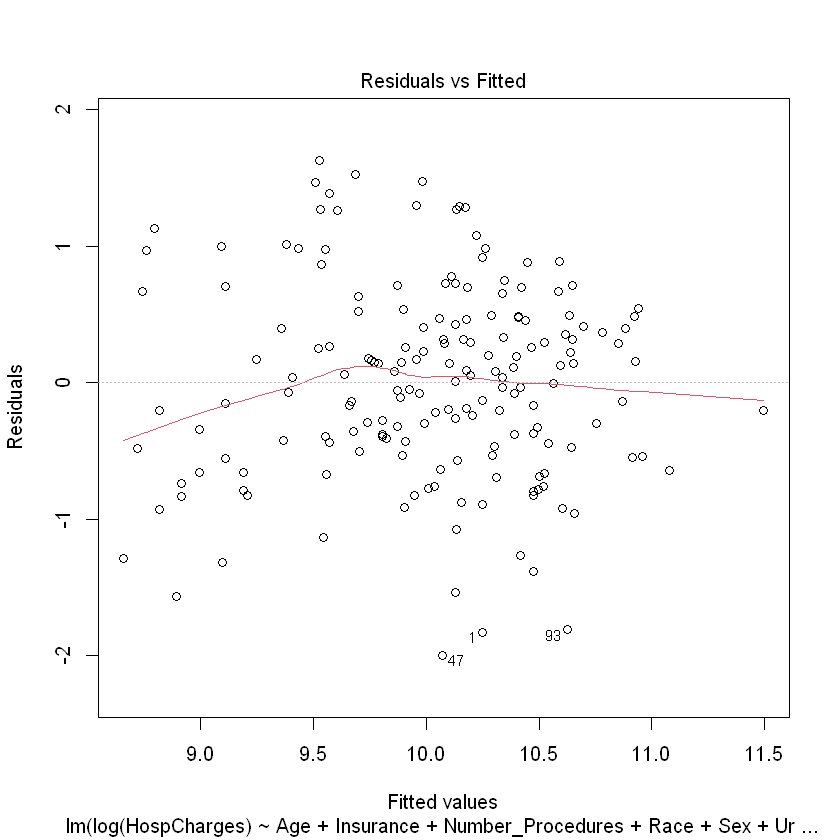

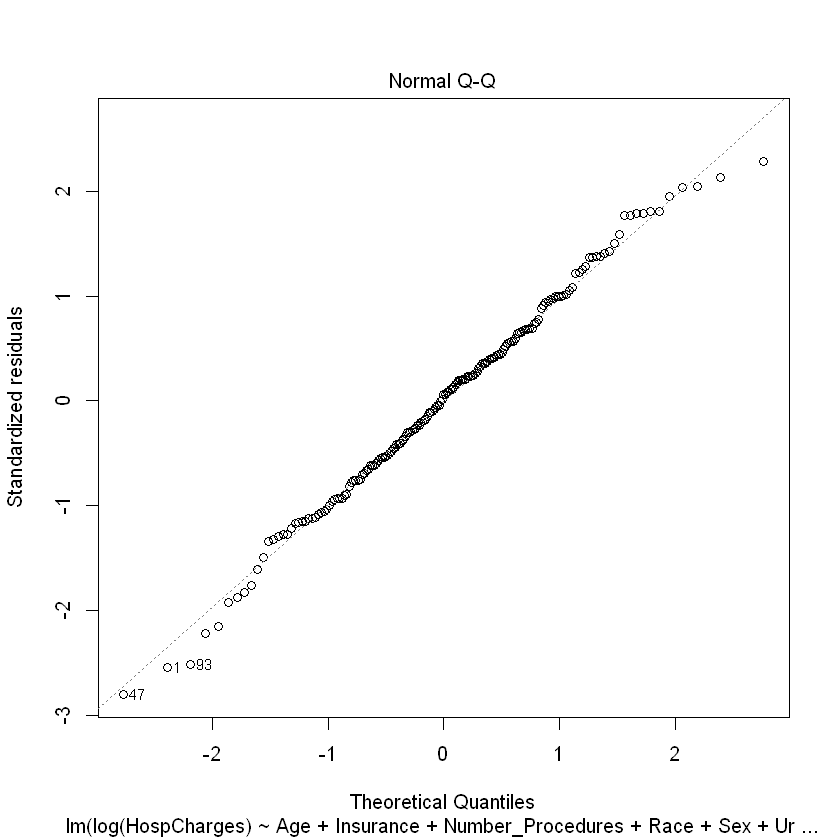

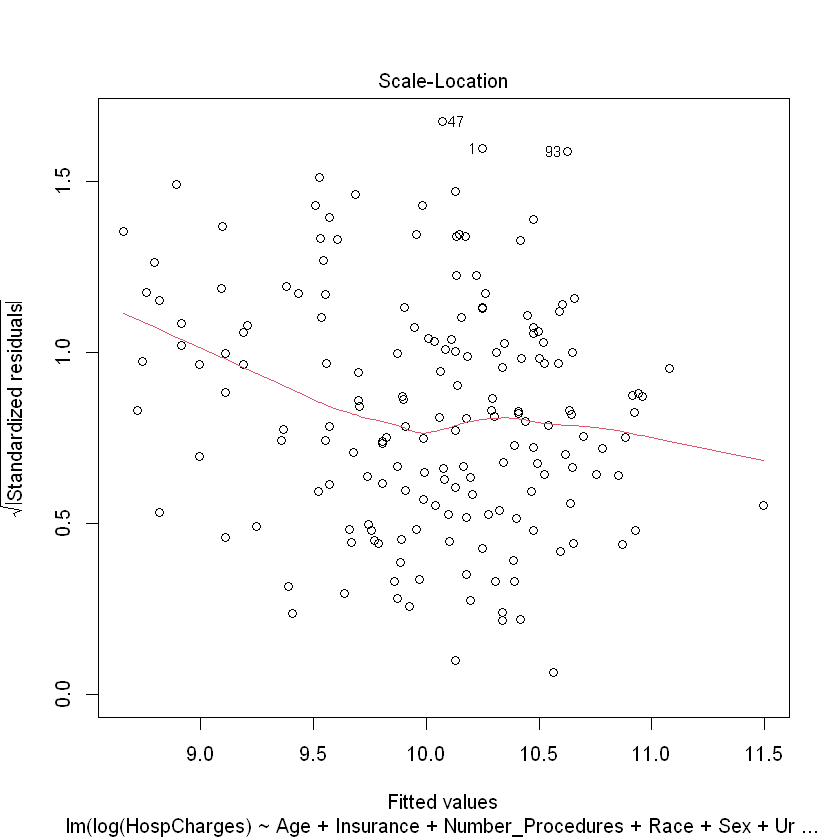

,rowname,Age,Insurance,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,-0.3800,-0.250,-0.2500,-0.099,0.011
2,Insurance,-0.380,1.0000,0.066,-0.0033,0.010,-0.024
3,Number_Procedures,-0.250,0.0660,1.000,0.0840,0.120,-0.110
4,Race,-0.250,-0.0033,0.084,1.0000,0.058,-0.190
5,Sex,-0.099,0.0100,0.120,0.0580,1.000,-0.036
6,Urban_Rural,0.011,-0.0240,-0.110,-0.1900,-0.036,1.000


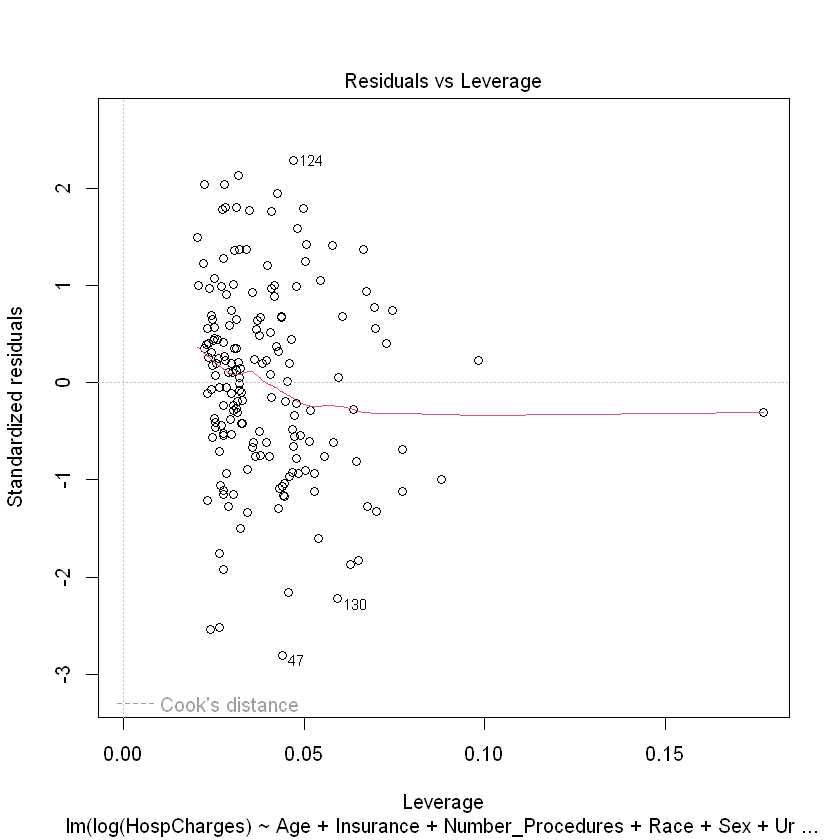

In [305]:
mod9 <- lm(log(HospCharges) ~ 
    Age + 
    #Income_Zip + 
    Insurance + 
    #Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex + 
    Urban_Rural
    ,data=df
    ,weights = Weight
)
summary(mod9)
data.frame(vif(mod9))
hist(residuals(mod9))
plot(mod9)
cor_mat(select(df, c( 
    Age , 
    #Income_Zip , 
    Insurance , 
    #Number_Diagnoses ,
    Number_Procedures , 
    Race , 
    Sex , 
    Urban_Rural
)),
method='spearman')

In [306]:
b <- "Original log-transformed model"
paste(b,'R-square: ',round(summary(mod4)$r.squared, digits=3))
paste(b,'Adjusted R-square: ',round(summary(mod4)$adj.r.squared, digits=3))

a <- "Model 9 "
paste(a,'R-square: ',round(summary(mod9)$r.squared, digits=3))
paste(a,'Adjusted R-square: ',round(summary(mod9)$adj.r.squared, digits=3))

[1] "Original log-transformed model R-square:  0.409"

[1] "Original log-transformed model Adjusted R-square:  0.381"

[1] "Model 9  R-square:  0.372"

[1] "Model 9  Adjusted R-square:  0.35"

In [307]:
b <- "Original log-transformed model"
paste(b,'R-square: ',round(summary(mod4)$r.squared, digits=3))
paste(b,'Adjusted R-square: ',round(summary(mod4)$adj.r.squared, digits=3))

for(m in list(mod5,mod6,mod7,mod8,mod9)){
    print(as.character(summary(m)[['call']][2]))
    print(paste('R-square: ', round(summary(m)[['r.squared']], digits=3)))
    print(paste('Adj. R-square: ', round(summary(m)[['r.squared']], digits=3)))
    print('-------------------------------------------------')
}

[1] "Original log-transformed model R-square:  0.409"

[1] "Original log-transformed model Adjusted R-square:  0.381"

[1] "log(HospCharges) ~ Age + Income_Zip + Insurance + Number_Procedures + Race + Sex + Urban_Rural"
[1] "R-square:  0.375"
[1] "Adj. R-square:  0.375"
[1] "-------------------------------------------------"
[1] "log(HospCharges) ~ Age + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural"
[1] "R-square:  0.409"
[1] "Adj. R-square:  0.409"
[1] "-------------------------------------------------"
[1] "log(HospCharges) ~ Age + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex"
[1] "R-square:  0.407"
[1] "Adj. R-square:  0.407"
[1] "-------------------------------------------------"
[1] "log(HospCharges) ~ Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural"
[1] "R-square:  0.287"
[1] "Adj. R-square:  0.287"
[1] "-------------------------------------------------"
[1] "log(HospCharges) ~ Age + Insurance + Number_Procedures + Race + Sex + Urban_Rural"
[1] "R-square:  0.372"
[1] "Adj. R-square:  0.372"
[1] "--------------------------

Of the models I tried, 

    log(HospCharges) ~ Age + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural

was the best fit. 

---

## Is the hassle of all of this worth the effort? In other words, is (are) the new model(s) that much better than the original model? What would your approach be here?

There were some techniques that had bigger impacts than others. Log-transforming the data had a particularily large impact on the results of the model. Tinkering around with the variables led to models with somewhat improved results, but the improvements were small and not likely worth the hassle of trying every linear combination of independent variables to find the best one...

...unless you automated the process. Automation would have a higher upfront time investment, but would produce reusable code for the next analysis. 

I am also interested in machine learning, or, letting the computer decide which model fits best. I'm curious to see how the model that I created here might compare with a machine-learning generated model, and I might experiment with it in Python

---

## How can you justify not doing any of these techniques when assumptions are violated?

My final, best performing model includes both Age and Number_Diagnoses, despite the correlation factor being quite high (0.59). 

On one hand, I could feel concerned about the issue of 'p-hacking' if I just blindly choose whichever model has the best p-value. Perhaps the inclusion of ind. variables with collinearity is overinflating the p-value, because the variables are essentially measuring the same thing? In this instance, we could think of it as including the same variable twice.

On the other hand, Age and Number_Diagnoses are not *perfectly* collinear. We see perfect collinearity when correlation factors approach 1. When this happens, it means that the two variable are measuring the same thing almost exactly, and the resultant model becomes unpredictable and unreliable. 

When we make these choices we must consider context. Age and Number_Diagnoses are not measuring the *exact* same thing, but they are similar variables. Generally speaking, we all collect diagnoses as we age. There is, however, information in Age that isn't neccesarily represented in Number_Diagnoses. There's also information in Number_Diagnoses that isn't represented in Age. A 20-year-old with no diagnoses still has a smaller chance of being hospitalized for something like a heart attack compared to a 60-year-old with zero diagnoses. Similarly, a 35-year-old with twelve diagnoses is more likely to be hospitalized than the 35-year-old with only two diagnoses. It makes sense, then, to include both variables in the model. 